In [2]:
import sys
import os
sys.path.append("../img2vec_pytorch")  # Adds higher directory to python modules path.
from img_to_vec import Img2Vec
from PIL import Image
from sklearn.metrics.pairwise import cosine_similarity
from scipy.stats import wasserstein_distance
import numpy as np
import glob
import shutil
from scipy import ndimage as ndi
from matplotlib import pyplot as plt
import matplotlib.image as mpimg

In [3]:
def get_vec_cs_wd(og, mg, img2vec):
    ogi = Image.open(og).convert('RGB')
    mgi = Image.open(mg).convert('RGB')
    ogVec = img2vec.get_vec(ogi)
    mgVec = img2vec.get_vec(mgi)
    cs = cosine_similarity(ogVec.reshape((1, -1)), mgVec.reshape((1, -1)))[0][0]
    wd = wasserstein_distance(ogVec.flatten(), mgVec.flatten())
    return cs, wd

In [4]:
def gen_score_txtfile(name, original_path, mongrel_path, base_path):
    img2vec = Img2Vec(cuda=True)
    f = open(base_path+name, "w+")
    for og, mg in zip(sorted(glob.glob(originals_path)), sorted(glob.glob(mongrel_path))):
        cs, wd = get_vec_cs_wd(og, mg, img2vec)
        f.write(og + "," + mg +","+str(cs)+","+str(wd)+"\n")
    f.close()
    return 1
    

In [149]:
macCodeDict = {}
with open("/home/jupyter/macFontCode.txt") as fp:
    for ct, line in enumerate(fp):
        tmp = line.split(",")
        macCodeDict[int(tmp[0])] = tmp[1].split(".ttf")[0]

In [8]:
originals_path = '/*home/*jupyter/*100Ktrips/*1616triples/*.png'
mongrel_path = '/*home/*jupyter/*100KtripsMY/*1616triples/*.png'
base_path = '/home/jupyter/Results/'
filename = "100K1616MY"
gen_score_txtfile(filename, originals_path, mongrel_path, base_path)

1

In [9]:
originals_path = '/*home/*jupyter/*100KtripsNFref/*1616triples/*.png'
mongrel_path = '/*home/*jupyter/*100KtripsNF/*1616triples/*.png'
base_path = '/home/jupyter/Results/'
filename = "100K1616NF"
gen_score_txtfile(filename, originals_path, mongrel_path, base_path)

/opt/conda/lib/python3.7/site-packages/torchvision/transforms/transforms.py:219: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  warnings.warn("The use of the transforms.Scale transform is deprecated, " +


1

In [183]:
# originals_path = '/*home/*jupyter/*MACtrips/*White/*1616triples/*.png'
# mongrel_path = '/*home/*jupyter/*1616MacMongrels/*.png'
# base_path = '/home/jupyter/Results/'
# filename = "white1616GT"
# gen_score_txtfile(filename, originals_path, mongrel_path, base_path)

/opt/conda/lib/python3.7/site-packages/torchvision/transforms/transforms.py:219: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  warnings.warn("The use of the transforms.Scale transform is deprecated, " +


1

In [15]:
def gen_table_wd_mac(name, myListFile, nfListFile, window):
    wdListMY = []
    with open(myListFile) as fp:
        ct = 0
        rwd = 0.0
        for cnt, line in enumerate(fp):
            ct+=1
            ogp, mgp, cs, wd = line.split(",")
            rwd += float(wd)
            if ct == 1:
                sogp, smgp = ogp, mgp
            if ct==window:
                ct = 0
                wdListMY.append((sogp, smgp, rwd/window))
                rwd = 0.0
    top5MY = sorted(wdListMY, key=lambda x: x[2])[0:5]
    bot5MY = sorted(wdListMY, key=lambda x: x[2])[-5:]
    
    wdListNF = []
    with open(nfListFile) as fp:
        ct = 0
        rwd = 0.0
        for cnt, line in enumerate(fp):
            ct+=1
            ogp, mgp, cs, wd = line.split(",")
            rwd += float(wd)
            if ct == 1:
                sogp, smgp = ogp, mgp
            if ct==window:
                ct = 0
                wdListNF.append((sogp, smgp, rwd/window))
                rwd = 0.0
    top5NF = sorted(wdListNF, key=lambda x: x[2])[0:5]
    bot5NF = sorted(wdListNF, key=lambda x: x[2])[-5:]

    fig, axes = plt.subplots(5, 4, figsize=(24,30))
    ax = axes.ravel()
    
    for fct, tup in enumerate(top5MY):
#         ax[fct*4].set_title(macCodeDict[int(os.path.basename(tup[0]).split("_0.")[0][1:])], size=24)
        ax[fct*4].set_title(os.path.basename(tup[0]).split("_0.")[0][1:], size=24)
        ax[fct*4].imshow(mpimg.imread(tup[0]), cmap='Greys_r')
        ax[fct*4+1].set_title("%.4f" % tup[2], size=24)
        ax[fct*4+1].imshow(mpimg.imread(tup[1]), cmap='Greys_r')
    
    for fct, tup in enumerate(top5NF):
#         ax[fct*4+2].set_title(macCodeDict[int(os.path.basename(tup[0]).split("_0_Reference.")[0][1:])], size=24)
        ax[fct*4+2].set_title(os.path.basename(tup[0]).split("_0_Reference.")[0][1:], size=24)
        ax[fct*4+2].imshow(mpimg.imread(tup[0]), cmap='Greys_r')
        ax[fct*4+3].set_title("%.4f" % tup[2], size=24)
        ax[fct*4+3].imshow(mpimg.imread(tup[1]), cmap='Greys_r')
    
    for a in ax:
        a.set_yticklabels([])
        a.set_xticklabels([])
        
    fig.tight_layout()
    fig.suptitle(name+" Top 5 Resnet18 Wasserstein Distance", size=34, fontweight='bold')
    fig.subplots_adjust(top=0.9)
    
    for ax, col in zip(axes[0], ["Original", "pix2pixHD Mongrel", "NeuroFovea Reference", "NeuroFovea Mongrel"]):
        ax.annotate(col, xy=(0.5, 1), xytext=(0, 55),
                    xycoords='axes fraction', textcoords='offset points',
                    size=21, ha='center', va='baseline', fontweight='bold')
        
    for ax, row in zip(axes[:,0], ["top 1", "top 2", "top 3", "top 4", "top 5"]):#, "bot 5", "bot 4", "bot 3", "bot 2", "bot 1"]):
        ax.annotate(row, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - 20, 0),
                xycoords=ax.yaxis.label, textcoords='offset points',
                size=21, ha='right', va='center', fontweight='bold')


    plt.savefig(base_path+name+" top5 wd", bbox_inches='tight')
    
    fig, axes = plt.subplots(5, 4, figsize=(24,30))
    ax = axes.ravel()
    
    for fct, tup in enumerate(bot5MY):
        #ax[fct*4].set_title(macCodeDict[int(os.path.basename(tup[0]).split("_0.")[0][1:])], size=24)
        ax[fct*4].set_title(os.path.basename(tup[0]).split("_0.")[0][1:], size=24)
        ax[fct*4].imshow(mpimg.imread(tup[0]), cmap='Greys_r')
        ax[fct*4+1].set_title("%.4f" % tup[2], size=24)
        ax[fct*4+1].imshow(mpimg.imread(tup[1]), cmap='Greys_r')
    
    for fct, tup in enumerate(bot5NF):
        #ax[fct*4+2].set_title(macCodeDict[int(os.path.basename(tup[0]).split("_0_Reference.")[0][1:])], size=24)
        ax[fct*4+2].set_title(os.path.basename(tup[0]).split("_0_Reference.")[0][1:], size=24)
        ax[fct*4+2].imshow(mpimg.imread(tup[0]), cmap='Greys_r')
        ax[fct*4+3].set_title("%.4f" % tup[2], size=24)
        ax[fct*4+3].imshow(mpimg.imread(tup[1]), cmap='Greys_r')
    
    for a in ax:
        a.set_yticklabels([])
        a.set_xticklabels([])
        
    fig.tight_layout()
    fig.suptitle(name+" Bottom 5 Resnet18 Wasserstein Distance", size=34, fontweight='bold')
    fig.subplots_adjust(top=0.9)
    
    for ax, col in zip(axes[0], ["Original", "pix2pixHD Mongrel", "NeuroFovea Reference", "NeuroFovea Mongrel"]):
        ax.annotate(col, xy=(0.5, 1), xytext=(0, 55),
                    xycoords='axes fraction', textcoords='offset points',
                    size=21, ha='center', va='baseline', fontweight='bold')
        
    for ax, row in zip(axes[:,0], ["bot 1", "bot 2", "bot 3", "bot 4", "bot 5"]):
        ax.annotate(row, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - 20, 0),
                xycoords=ax.yaxis.label, textcoords='offset points',
                size=21, ha='right', va='center', fontweight='bold')


    plt.savefig(base_path+name+" bot5 wd", bbox_inches='tight')

In [14]:
def gen_table_cs_mac(name, myListFile, nfListFile, window):
    wdListMY = []
    with open(myListFile) as fp:
        ct = 0
        rwd = 0.0
        for cnt, line in enumerate(fp):
            ct+=1
            ogp, mgp, cs, wd = line.split(",")
            rwd += float(cs)
            if ct == 1:
                sogp, smgp = ogp, mgp
            if ct==window:
                ct = 0
                wdListMY.append((sogp, smgp, rwd/window))
                rwd = 0.0
    top5MY = sorted(wdListMY, key=lambda x: x[2])[-5:]
    bot5MY = sorted(wdListMY, key=lambda x: x[2])[0:5]
    
    wdListNF = []
    with open(nfListFile) as fp:
        ct = 0
        rwd = 0.0
        for cnt, line in enumerate(fp):
            ct+=1
            ogp, mgp, cs, wd = line.split(",")
            rwd += float(cs)
            if ct == 1:
                sogp, smgp = ogp, mgp
            if ct==window:
                ct = 0
                wdListNF.append((sogp, smgp, rwd/window))
                rwd = 0.0
    top5NF = sorted(wdListNF, key=lambda x: x[2])[-5:]
    bot5NF = sorted(wdListNF, key=lambda x: x[2])[0:5]

    fig, axes = plt.subplots(5, 4, figsize=(24,30))
    ax = axes.ravel()
    
    for fct, tup in enumerate(top5MY):
        #ax[fct*4].set_title(macCodeDict[int(os.path.basename(tup[0]).split("_0.")[0][1:])], size=24)
        ax[fct*4].set_title(os.path.basename(tup[0]).split("_0.")[0][1:], size=24)
        ax[fct*4].imshow(mpimg.imread(tup[0]), cmap='Greys_r')
        ax[fct*4+1].set_title("%.4f" % tup[2], size=24)
        ax[fct*4+1].imshow(mpimg.imread(tup[1]), cmap='Greys_r')
    
    for fct, tup in enumerate(top5NF):
        #ax[fct*4+2].set_title(macCodeDict[int(os.path.basename(tup[0]).split("_0_Reference.")[0][1:])], size=24)
        ax[fct*4+2].set_title(os.path.basename(tup[0]).split("_0_Reference.")[0][1:], size=24)
        ax[fct*4+2].imshow(mpimg.imread(tup[0]), cmap='Greys_r')
        ax[fct*4+3].set_title("%.4f" % tup[2], size=24)
        ax[fct*4+3].imshow(mpimg.imread(tup[1]), cmap='Greys_r')
    
    for a in ax:
        a.set_yticklabels([])
        a.set_xticklabels([])
        
    fig.tight_layout()
    fig.suptitle(name+" Top 5 Resnet18 Cosine Similarity", size=34, fontweight='bold')
    fig.subplots_adjust(top=0.9)
    
    for ax, col in zip(axes[0], ["Original", "pix2pixHD Mongrel", "NeuroFovea Reference", "NeuroFovea Mongrel"]):
        ax.annotate(col, xy=(0.5, 1), xytext=(0, 55),
                    xycoords='axes fraction', textcoords='offset points',
                    size=21, ha='center', va='baseline', fontweight='bold')
        
    for ax, row in zip(axes[:,0], ["top 1", "top 2", "top 3", "top 4", "top 5"]):#, "bot 5", "bot 4", "bot 3", "bot 2", "bot 1"]):
        ax.annotate(row, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - 20, 0),
                xycoords=ax.yaxis.label, textcoords='offset points',
                size=21, ha='right', va='center', fontweight='bold')


    plt.savefig(base_path+name+" top5 cs", bbox_inches='tight')
    
    fig, axes = plt.subplots(5, 4, figsize=(24,30))
    ax = axes.ravel()
    
    for fct, tup in enumerate(bot5MY):
#         ax[fct*4].set_title(macCodeDict[int(os.path.basename(tup[0]).split("_0.")[0][1:])], size=24)
        ax[fct*4].set_title(os.path.basename(tup[0]).split("_0.")[0][1:], size=24)
        ax[fct*4].imshow(mpimg.imread(tup[0]), cmap='Greys_r')
        ax[fct*4+1].set_title("%.4f" % tup[2], size=24)
        ax[fct*4+1].imshow(mpimg.imread(tup[1]), cmap='Greys_r')
    
    for fct, tup in enumerate(bot5NF):
#         ax[fct*4+2].set_title(macCodeDict[int(os.path.basename(tup[0]).split("_0_Reference.")[0][1:])], size=24)
        ax[fct*4+2].set_title(os.path.basename(tup[0]).split("_0_Reference.")[0][1:], size=24)
        ax[fct*4+2].imshow(mpimg.imread(tup[0]), cmap='Greys_r')
        ax[fct*4+3].set_title("%.4f" % tup[2], size=24)
        ax[fct*4+3].imshow(mpimg.imread(tup[1]), cmap='Greys_r')
    
    for a in ax:
        a.set_yticklabels([])
        a.set_xticklabels([])
        
    fig.tight_layout()
    fig.suptitle(name+" Bottom 5 Resnet18 Cosine Similarity", size=34, fontweight='bold')
    fig.subplots_adjust(top=0.9)
    
    for ax, col in zip(axes[0], ["Original", "pix2pixHD Mongrel", "NeuroFovea Reference", "NeuroFovea Mongrel"]):
        ax.annotate(col, xy=(0.5, 1), xytext=(0, 55),
                    xycoords='axes fraction', textcoords='offset points',
                    size=21, ha='center', va='baseline', fontweight='bold')
        
    for ax, row in zip(axes[:,0], ["bot 1", "bot 2", "bot 3", "bot 4", "bot 5"]):
        ax.annotate(row, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - 20, 0),
                xycoords=ax.yaxis.label, textcoords='offset points',
                size=21, ha='right', va='center', fontweight='bold')


    plt.savefig(base_path+name+" bot5 cs", bbox_inches='tight')
    

In [204]:
def gen_table_gt(name, gtListFile, window):
    #do cs
    wdListMY = []
    with open(gtListFile) as fp:
        ct = 0
        rwd = 0.0
        for cnt, line in enumerate(fp):
            ct+=1
            ogp, mgp, cs, wd = line.split(",")
            rwd += float(cs)
            if ct == 1:
                sogp, smgp = ogp, mgp
            if ct==window:
                ct = 0
                wdListMY.append((sogp, smgp, rwd/window))
                rwd = 0.0
    top5MY = sorted(wdListMY, key=lambda x: x[2])[-5:]
    bot5MY = sorted(wdListMY, key=lambda x: x[2])[0:5]
    
    #do wd
    wdListNF = []
    with open(gtListFile) as fp:
        ct = 0
        rwd = 0.0
        for cnt, line in enumerate(fp):
            ct+=1
            ogp, mgp, cs, wd = line.split(",")
            rwd += float(wd)
            if ct == 1:
                sogp, smgp = ogp, mgp
            if ct==window:
                ct = 0
                wdListNF.append((sogp, smgp, rwd/window))
                rwd = 0.0
    top5NF = sorted(wdListNF, key=lambda x: x[2])[0:5]
    bot5NF = sorted(wdListNF, key=lambda x: x[2])[-5:]

    fig, axes = plt.subplots(5, 4, figsize=(24,30))
    ax = axes.ravel()
    
    for fct, tup in enumerate(top5MY):
        ax[fct*4].set_title(macCodeDict[int(os.path.basename(tup[0]).split("_0.")[0][1:])], size=24)
        ax[fct*4].imshow(mpimg.imread(tup[0]), cmap='Greys_r')
        ax[fct*4+1].set_title("%.4f" % tup[2], size=24)
        ax[fct*4+1].imshow(mpimg.imread(tup[1]), cmap='Greys_r')
    
    for fct, tup in enumerate(top5NF):
        ax[fct*4+2].set_title(macCodeDict[int(os.path.basename(tup[0]).split("_0.")[0][1:])], size=24)
        ax[fct*4+2].imshow(mpimg.imread(tup[0]), cmap='Greys_r')
        ax[fct*4+3].set_title("%.4f" % tup[2], size=24)
        ax[fct*4+3].imshow(mpimg.imread(tup[1]), cmap='Greys_r')
    
    for a in ax:
        a.set_yticklabels([])
        a.set_xticklabels([])
        
    fig.tight_layout()
    fig.suptitle(name+" Top 5 Resnet18 Ground Truth (TTM)", size=34, fontweight='bold')
    fig.subplots_adjust(top=0.9)
    
    for ax, col in zip(axes[0], ["Original", "Cosine Similarity", "Original", "Wasserstein Distance"]):
        ax.annotate(col, xy=(0.5, 1), xytext=(0, 55),
                    xycoords='axes fraction', textcoords='offset points',
                    size=21, ha='center', va='baseline', fontweight='bold')
        
    for ax, row in zip(axes[:,0], ["top 1", "top 2", "top 3", "top 4", "top 5"]):#, "bot 5", "bot 4", "bot 3", "bot 2", "bot 1"]):
        ax.annotate(row, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - 20, 0),
                xycoords=ax.yaxis.label, textcoords='offset points',
                size=21, ha='right', va='center', fontweight='bold')


    plt.savefig(base_path+name+" top5 gt", bbox_inches='tight')
    
    fig, axes = plt.subplots(5, 4, figsize=(24,30))
    ax = axes.ravel()
    
    for fct, tup in enumerate(bot5MY):
        ax[fct*4].set_title(macCodeDict[int(os.path.basename(tup[0]).split("_0.")[0][1:])], size=24)
        ax[fct*4].imshow(mpimg.imread(tup[0]), cmap='Greys_r')
        ax[fct*4+1].set_title("%.4f" % tup[2], size=24)
        ax[fct*4+1].imshow(mpimg.imread(tup[1]), cmap='Greys_r')
    
    for fct, tup in enumerate(bot5NF):
        ax[fct*4+2].set_title(macCodeDict[int(os.path.basename(tup[0]).split("_0.")[0][1:])], size=24)
        ax[fct*4+2].imshow(mpimg.imread(tup[0]), cmap='Greys_r')
        ax[fct*4+3].set_title("%.4f" % tup[2], size=24)
        ax[fct*4+3].imshow(mpimg.imread(tup[1]), cmap='Greys_r')
    
    for a in ax:
        a.set_yticklabels([])
        a.set_xticklabels([])
        
    fig.tight_layout()
    fig.suptitle(name+" Bottom 5 Resnet18 Ground Truth (TTM)", size=34, fontweight='bold')
    fig.subplots_adjust(top=0.9)
    
    for ax, col in zip(axes[0], ["Original", "Cosine Similarity", "Original", "Wasserstein Distance"]):
        ax.annotate(col, xy=(0.5, 1), xytext=(0, 55),
                    xycoords='axes fraction', textcoords='offset points',
                    size=21, ha='center', va='baseline', fontweight='bold')
        
    for ax, row in zip(axes[:,0], ["bot 1", "bot 2", "bot 3", "bot 4", "bot 5"]):
        ax.annotate(row, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - 20, 0),
                xycoords=ax.yaxis.label, textcoords='offset points',
                size=21, ha='right', va='center', fontweight='bold')


    plt.savefig(base_path+name+" bot5 gt", bbox_inches='tight')
    

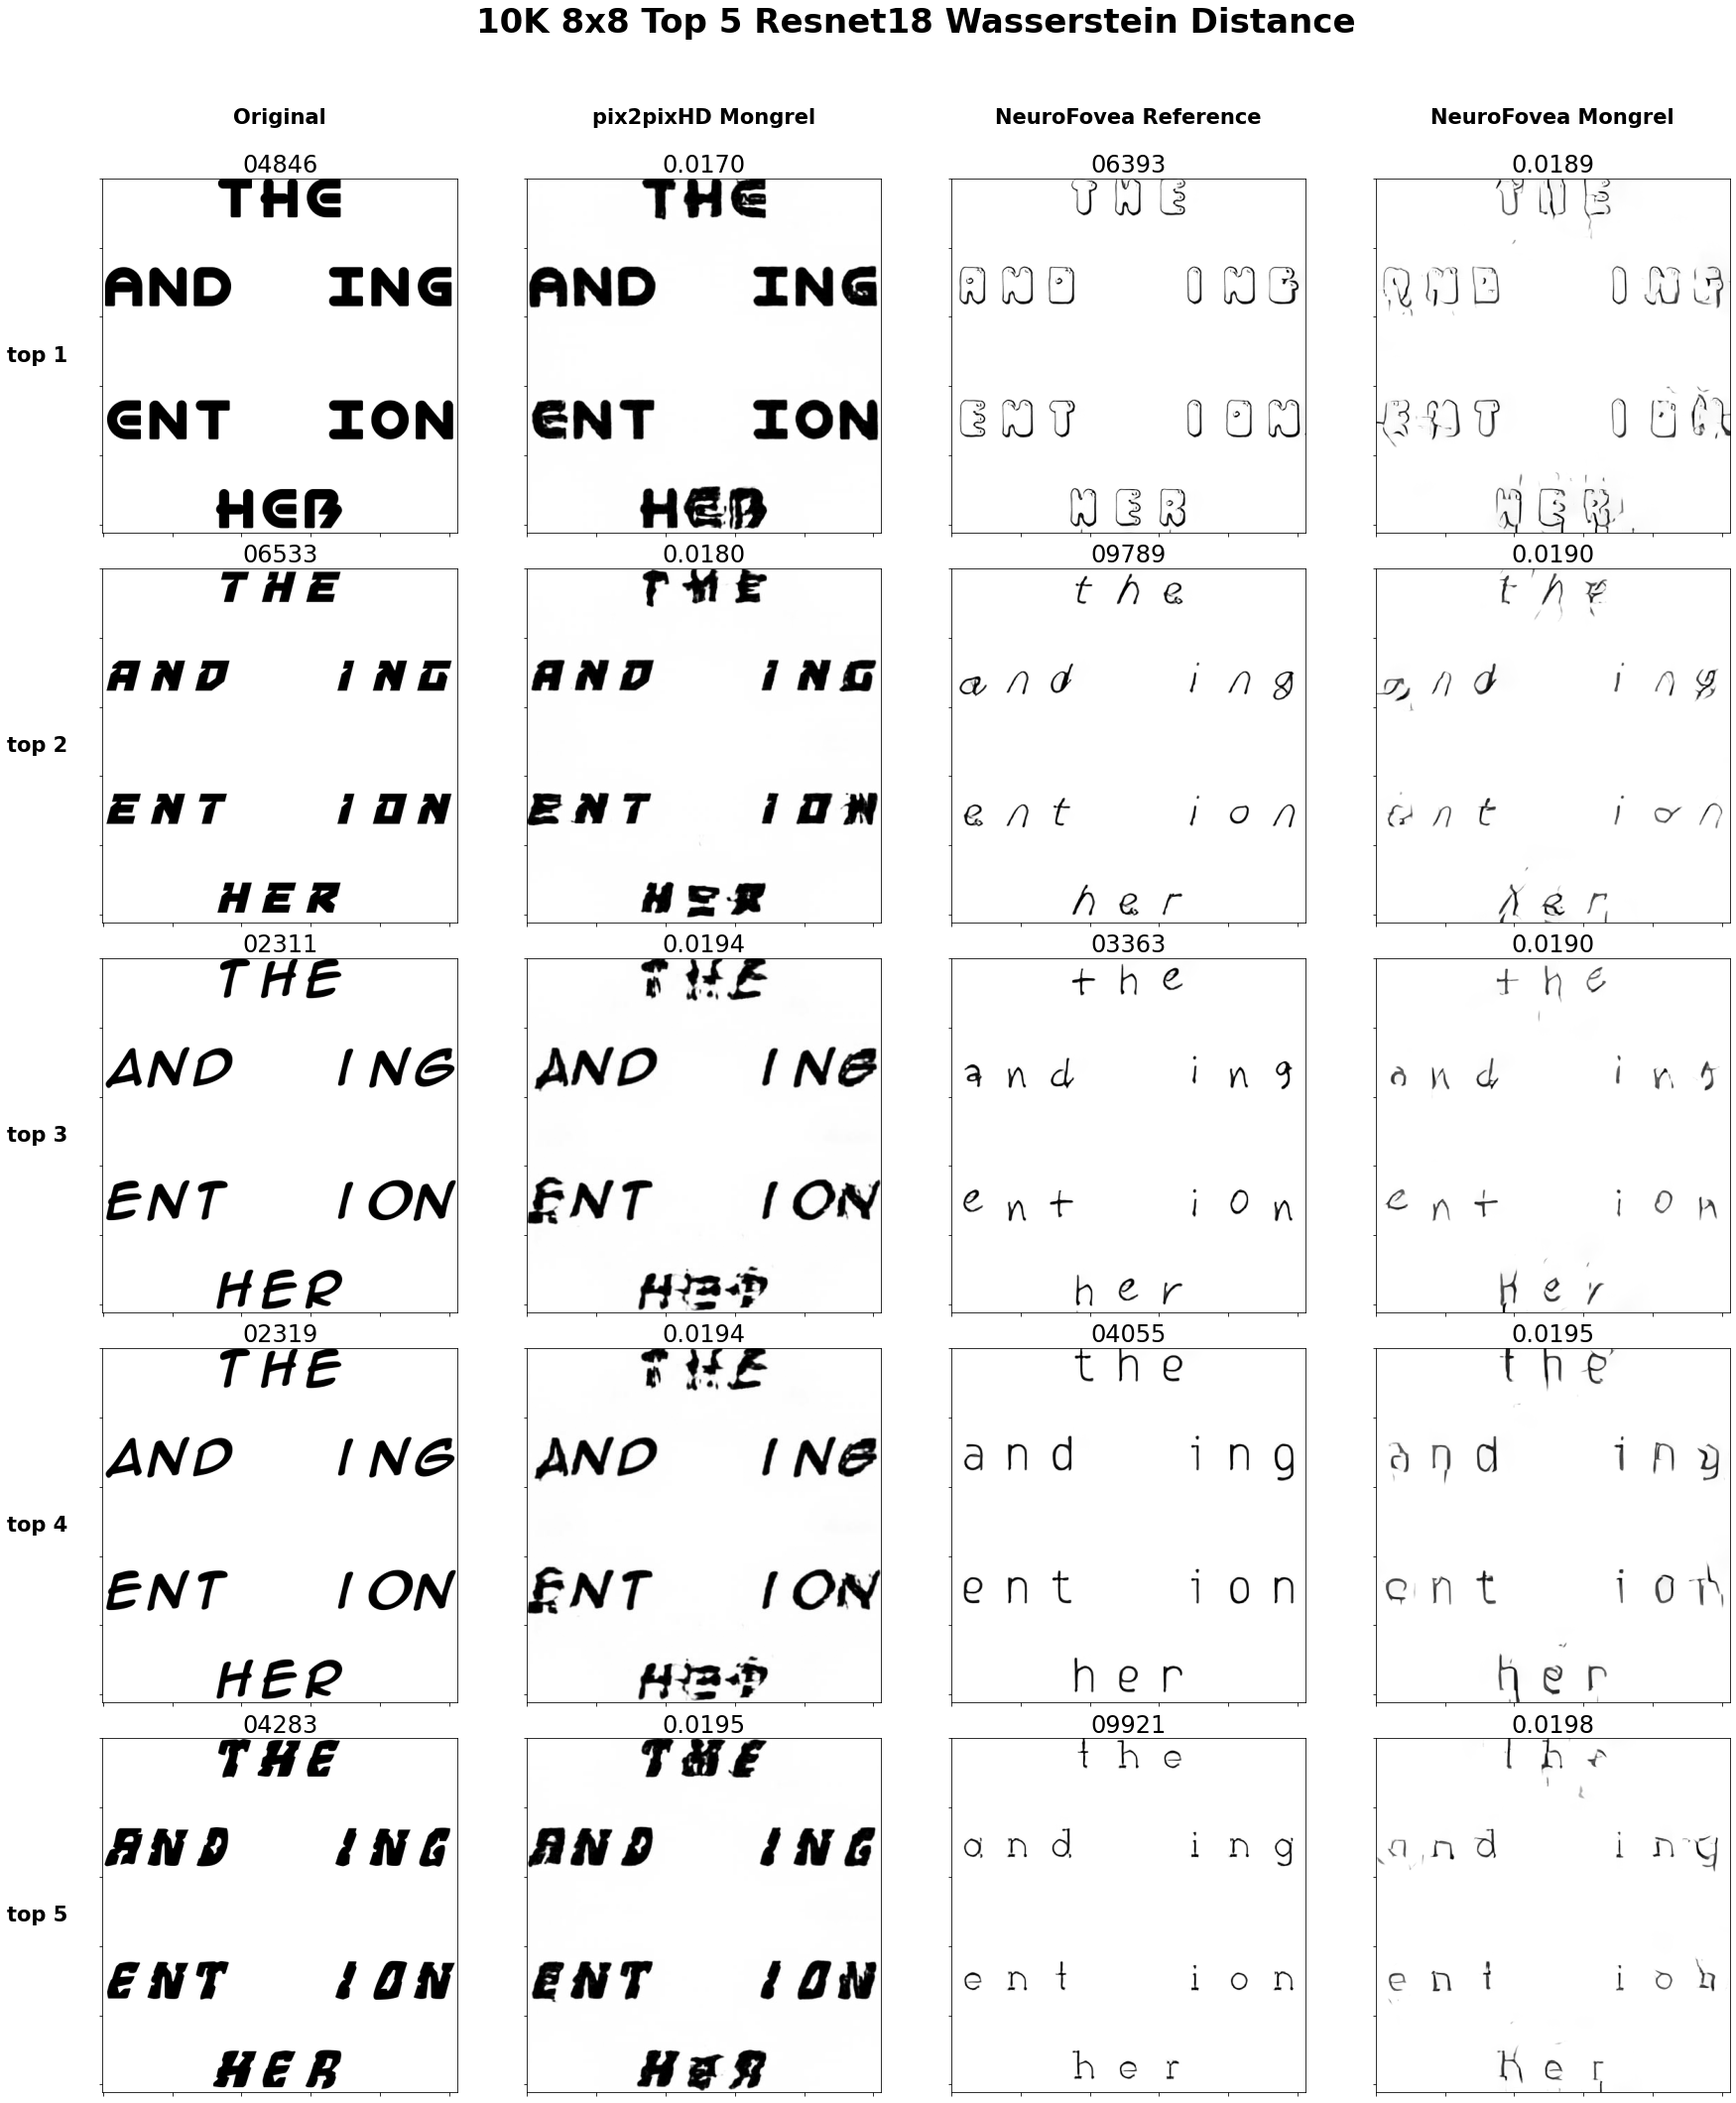

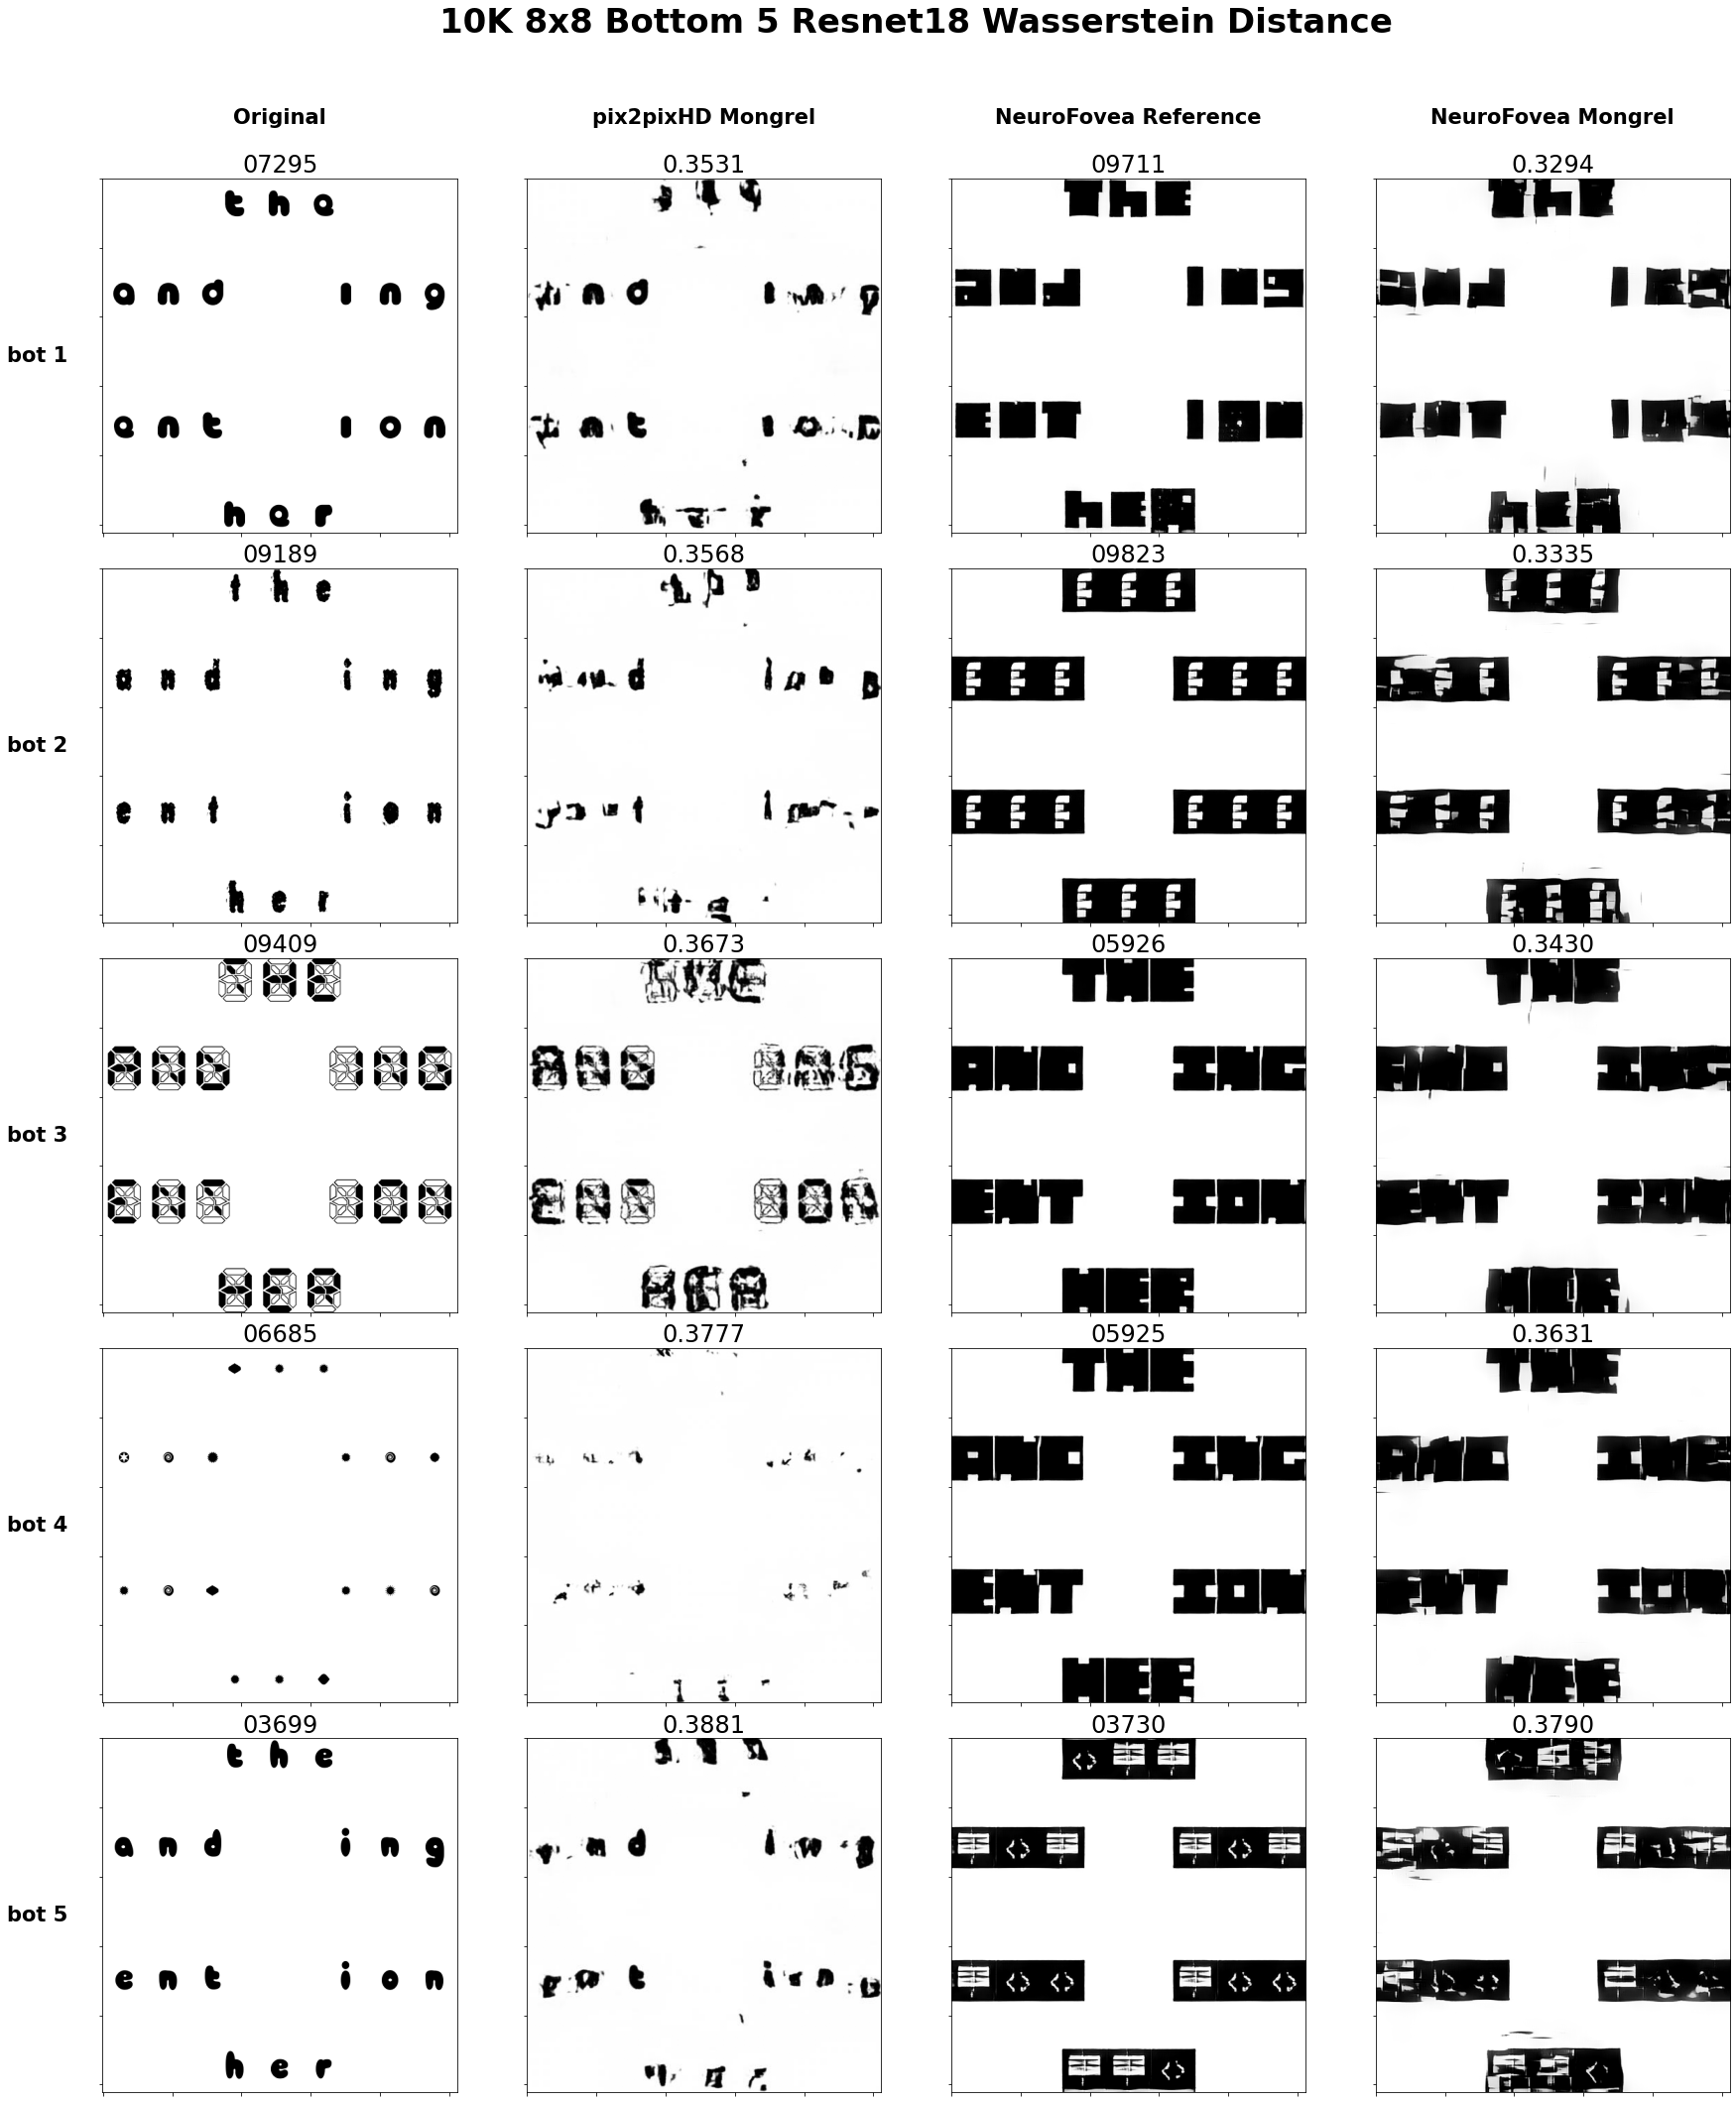

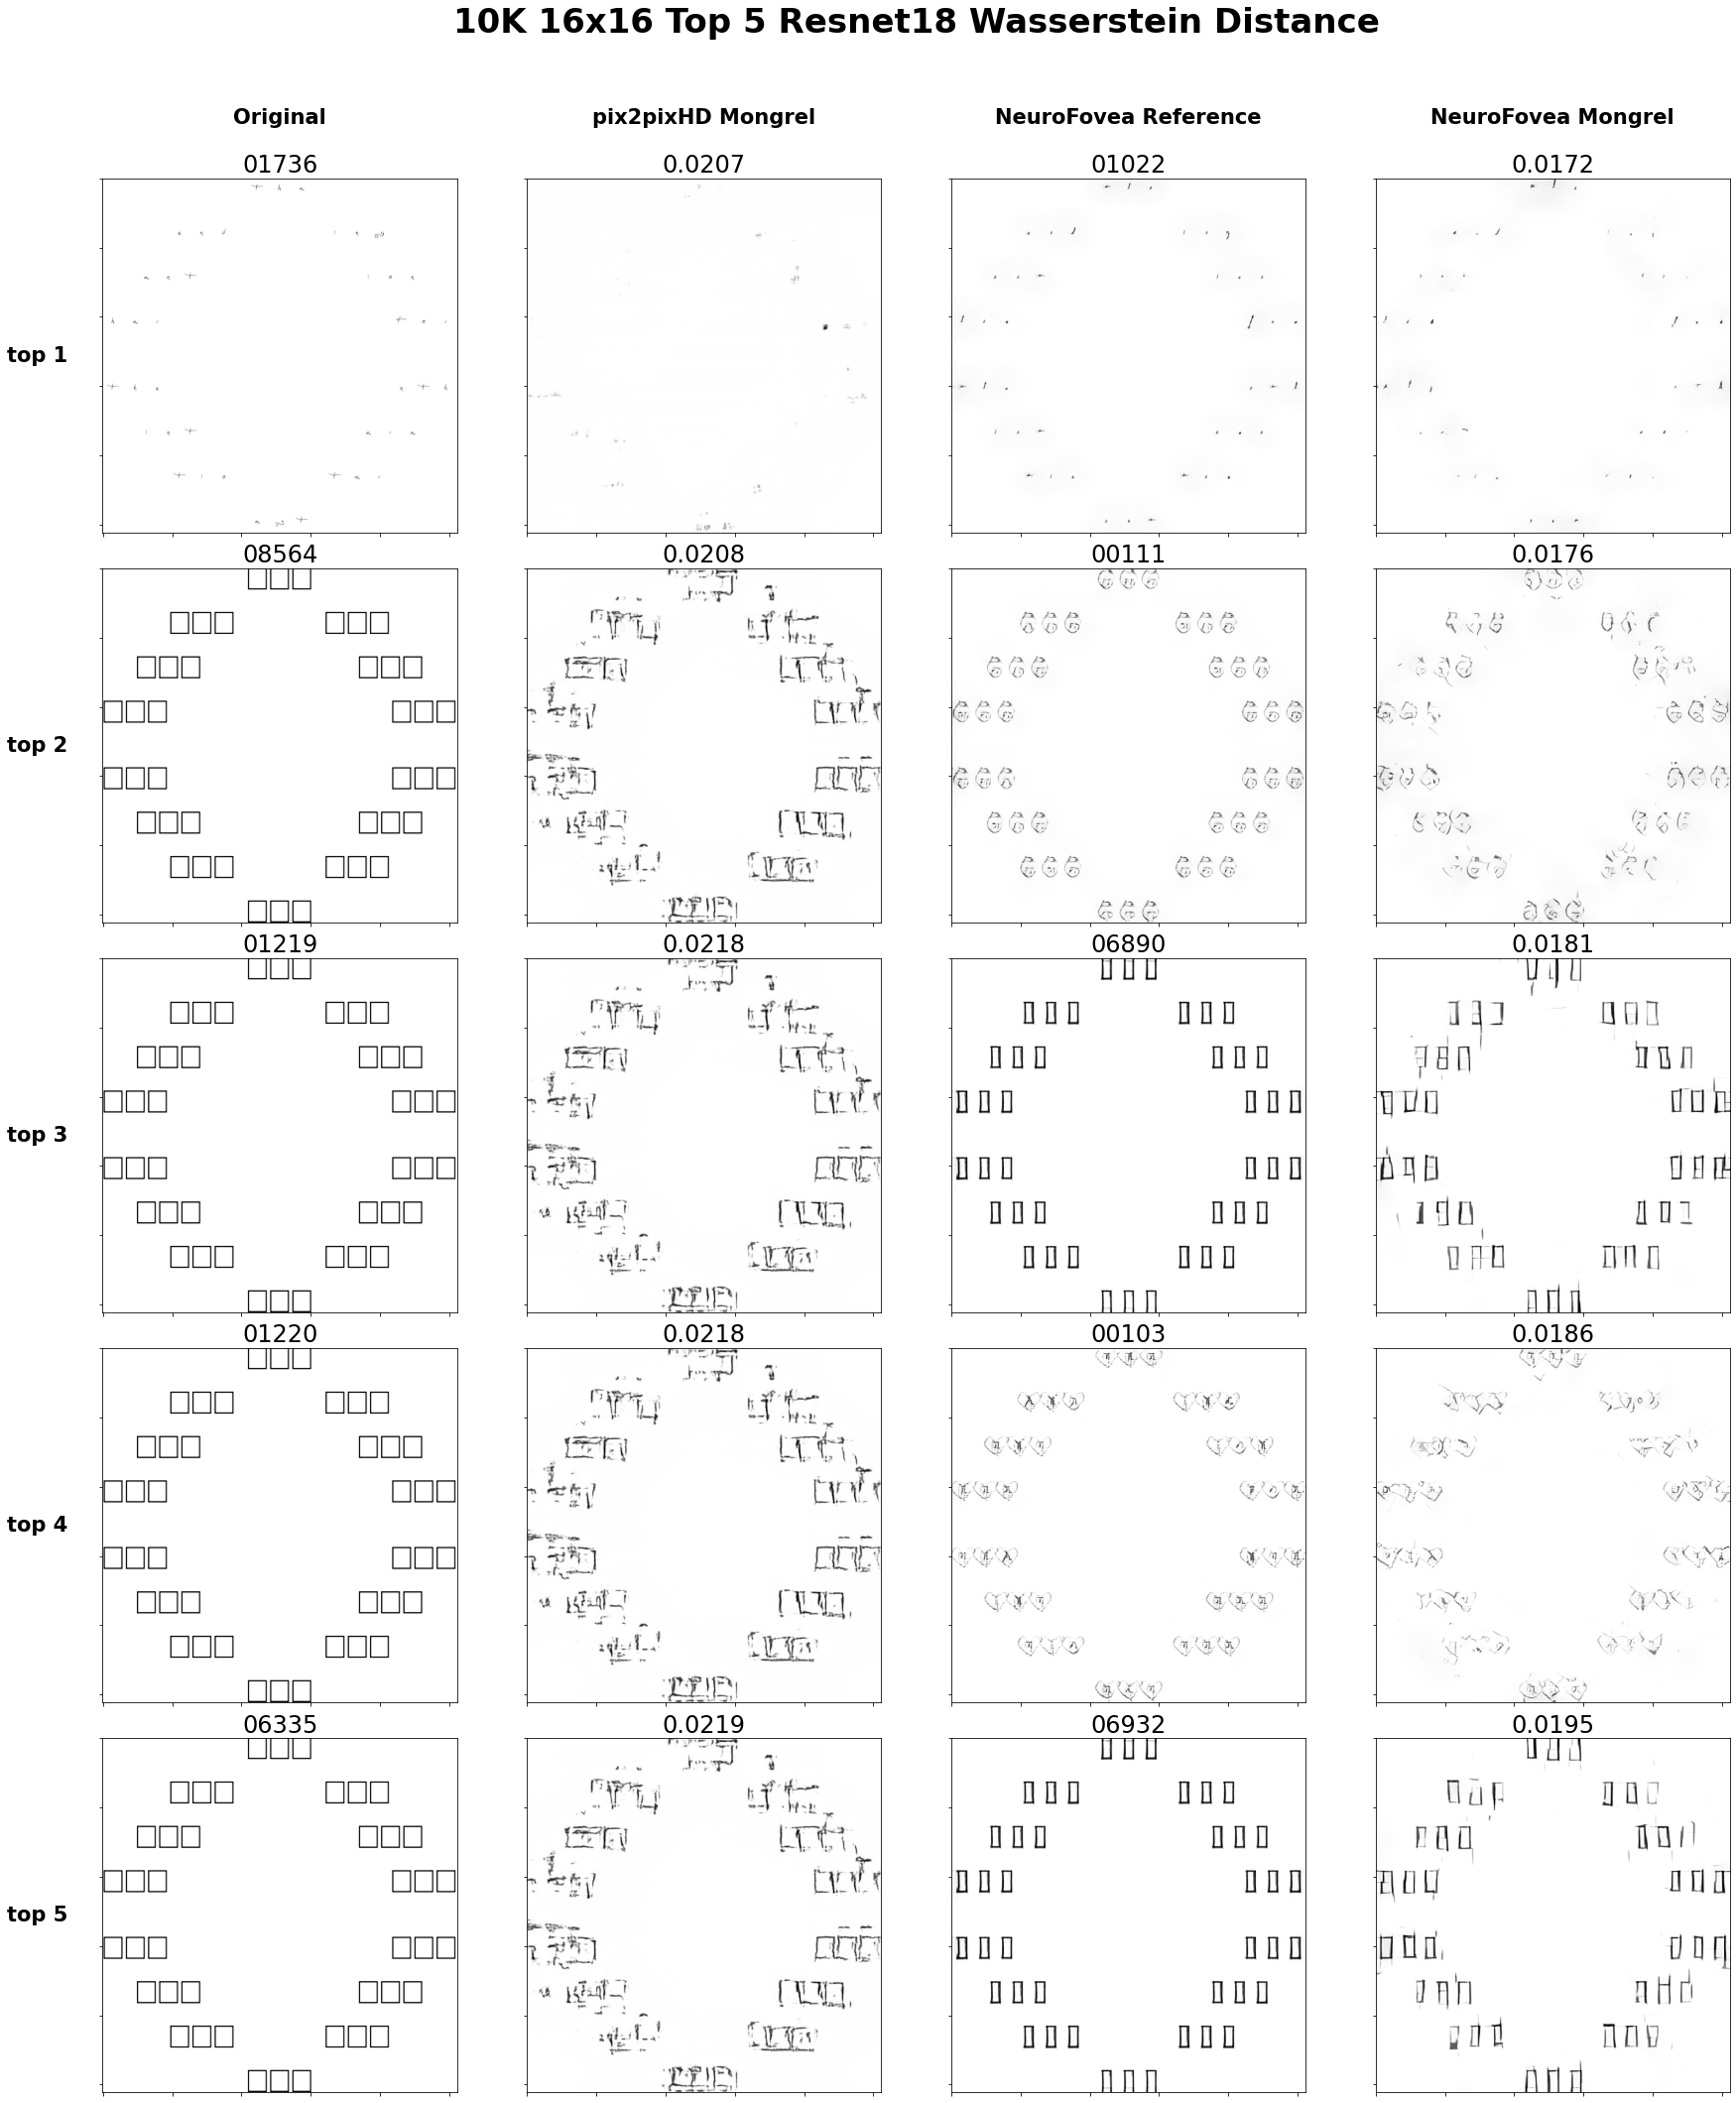

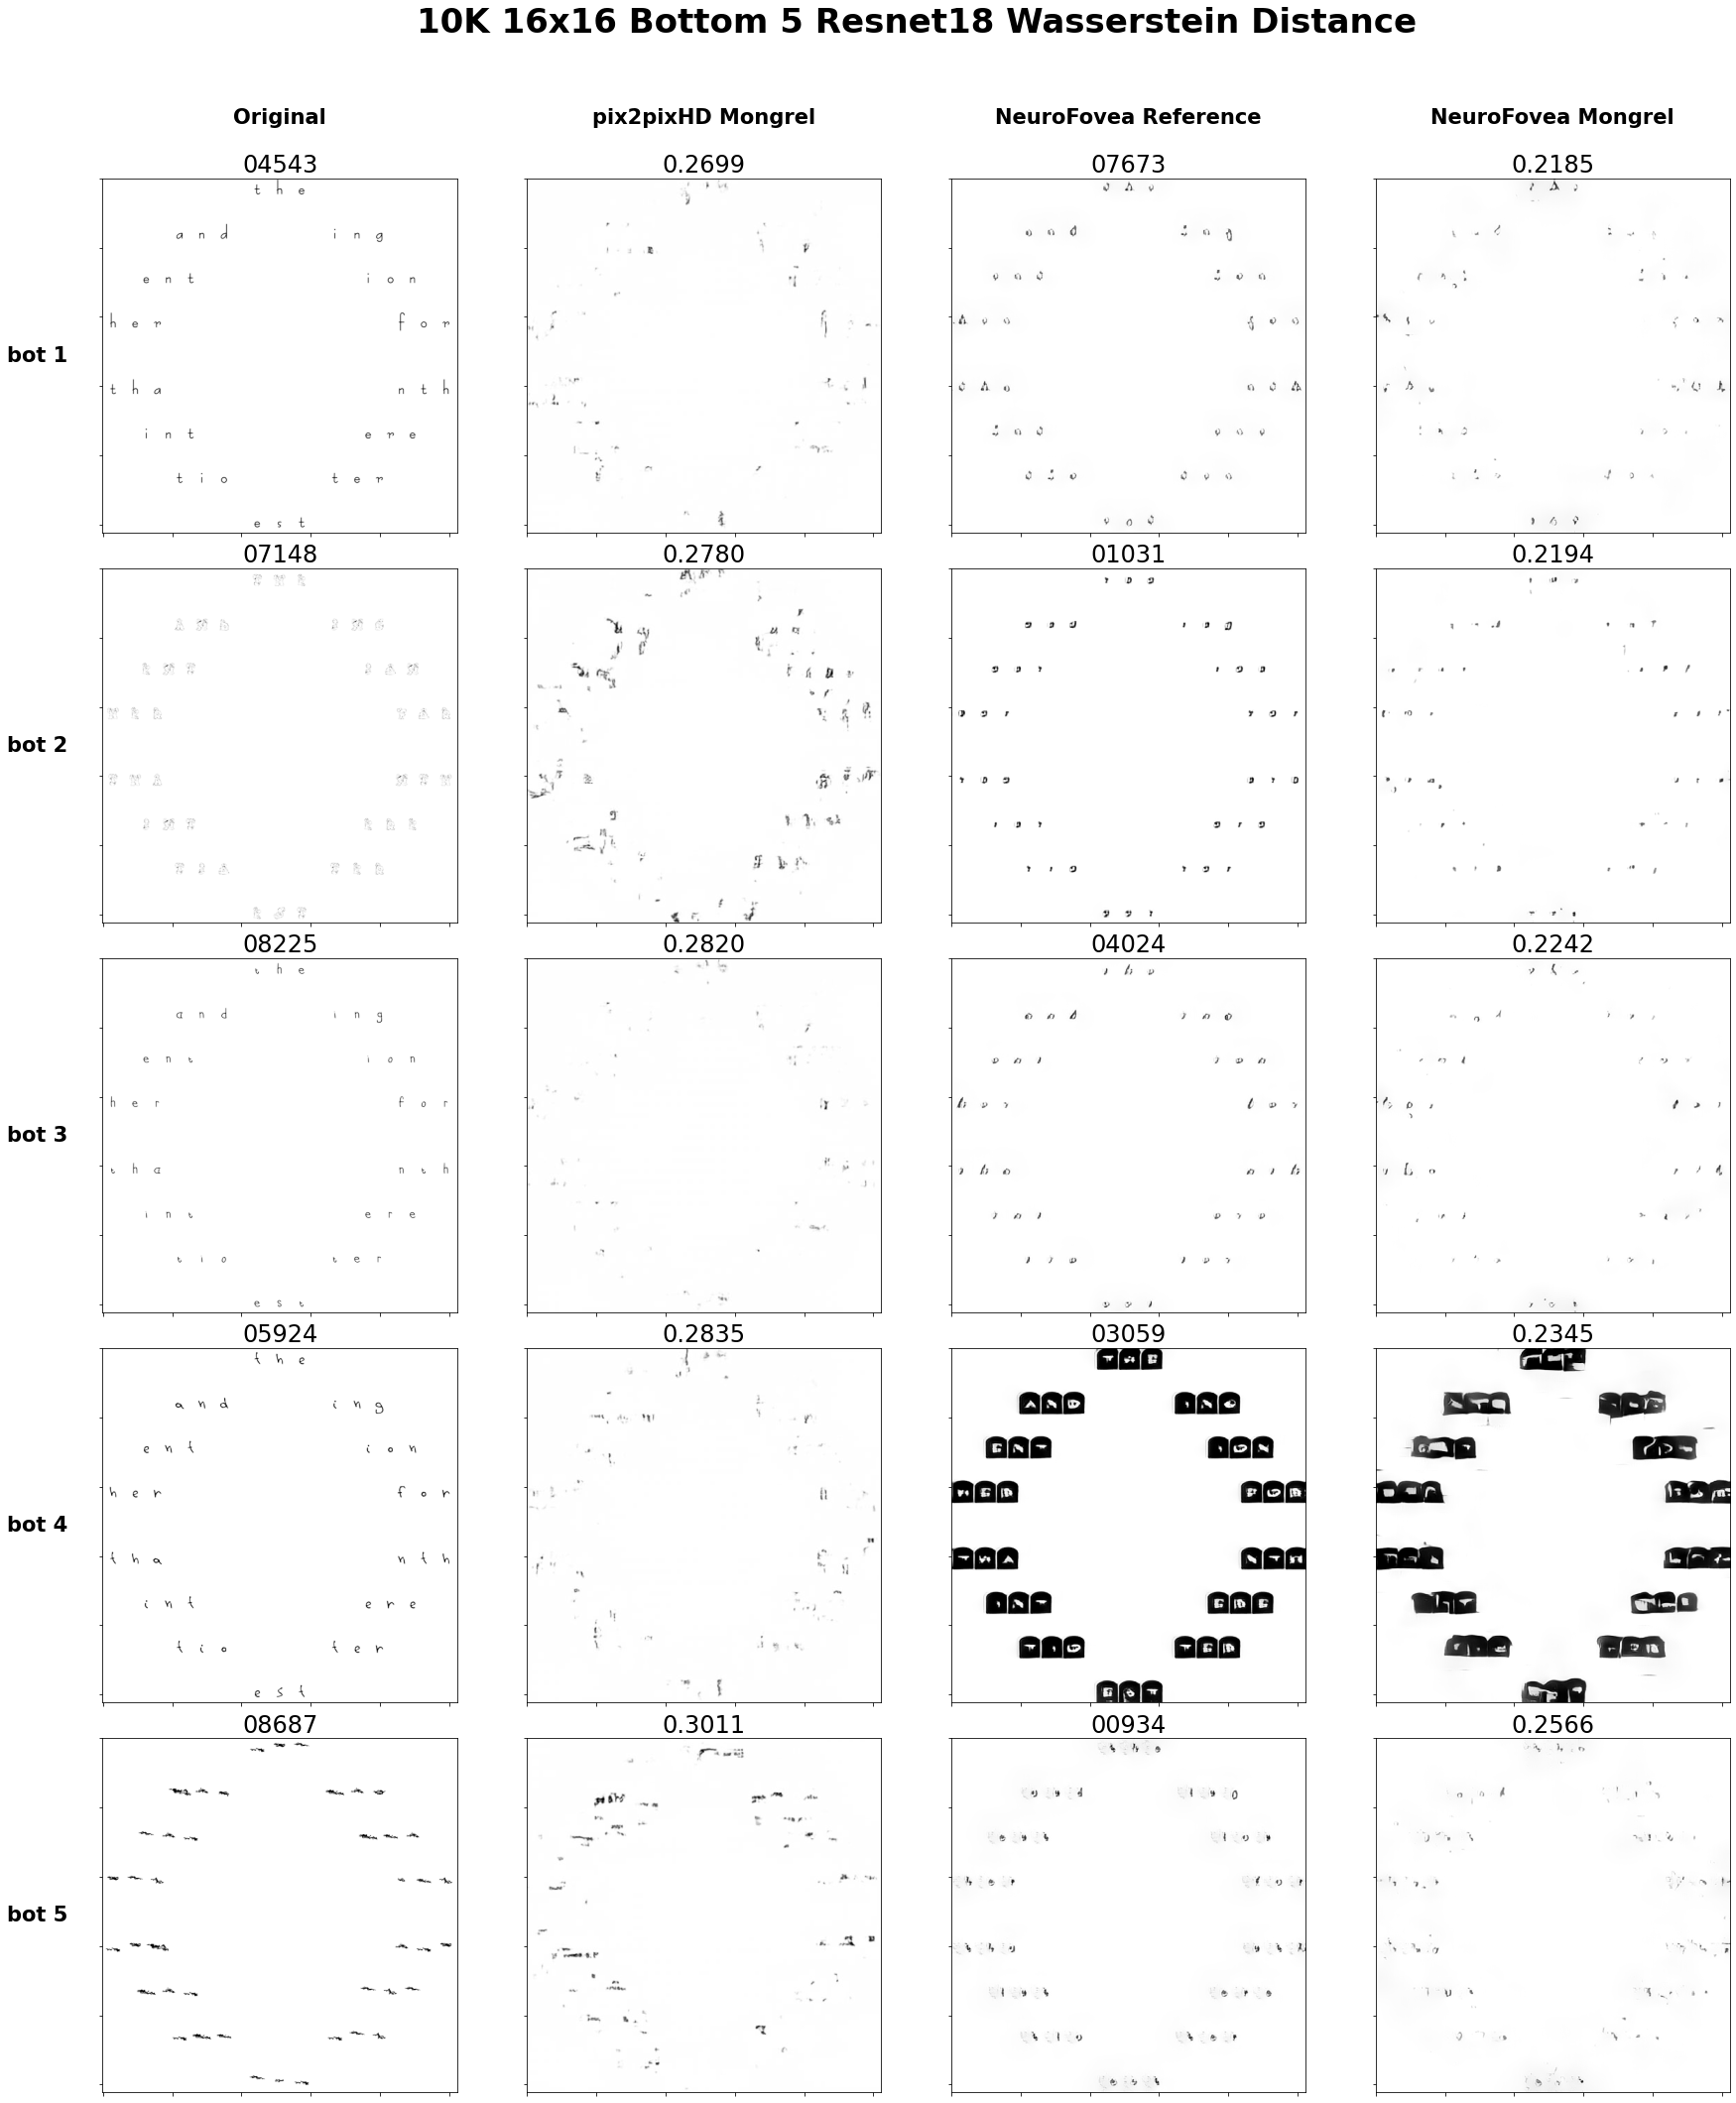

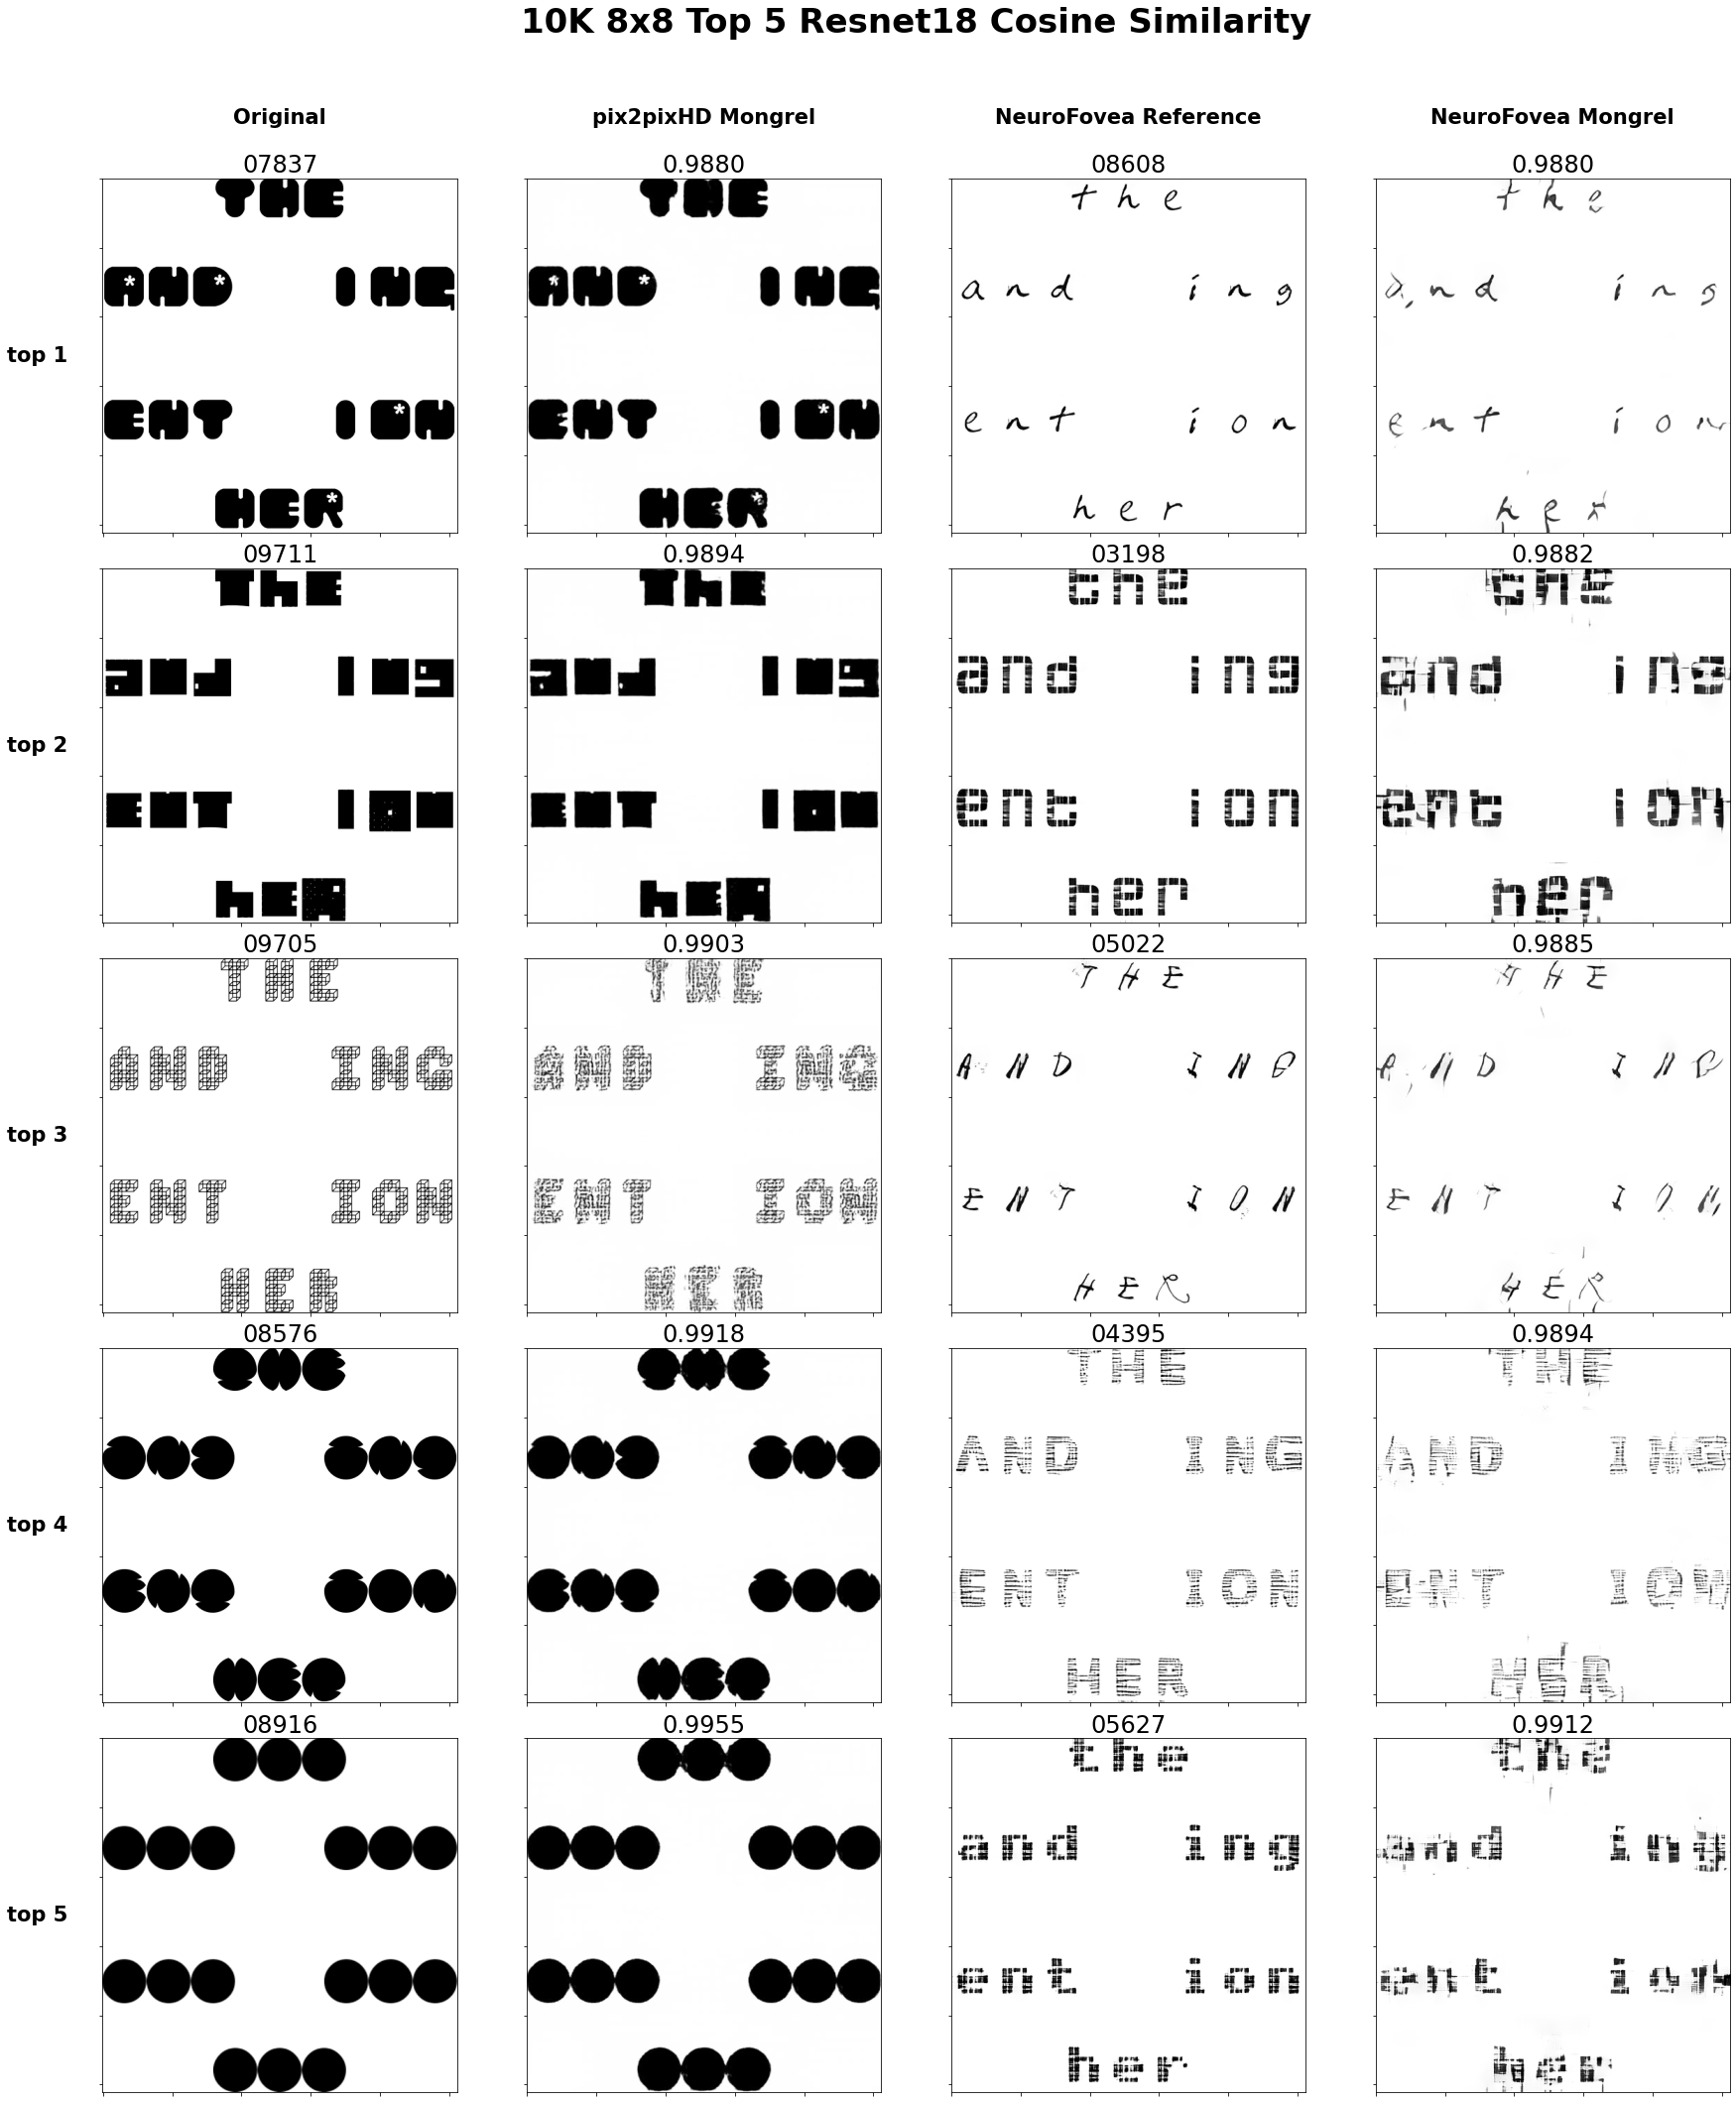

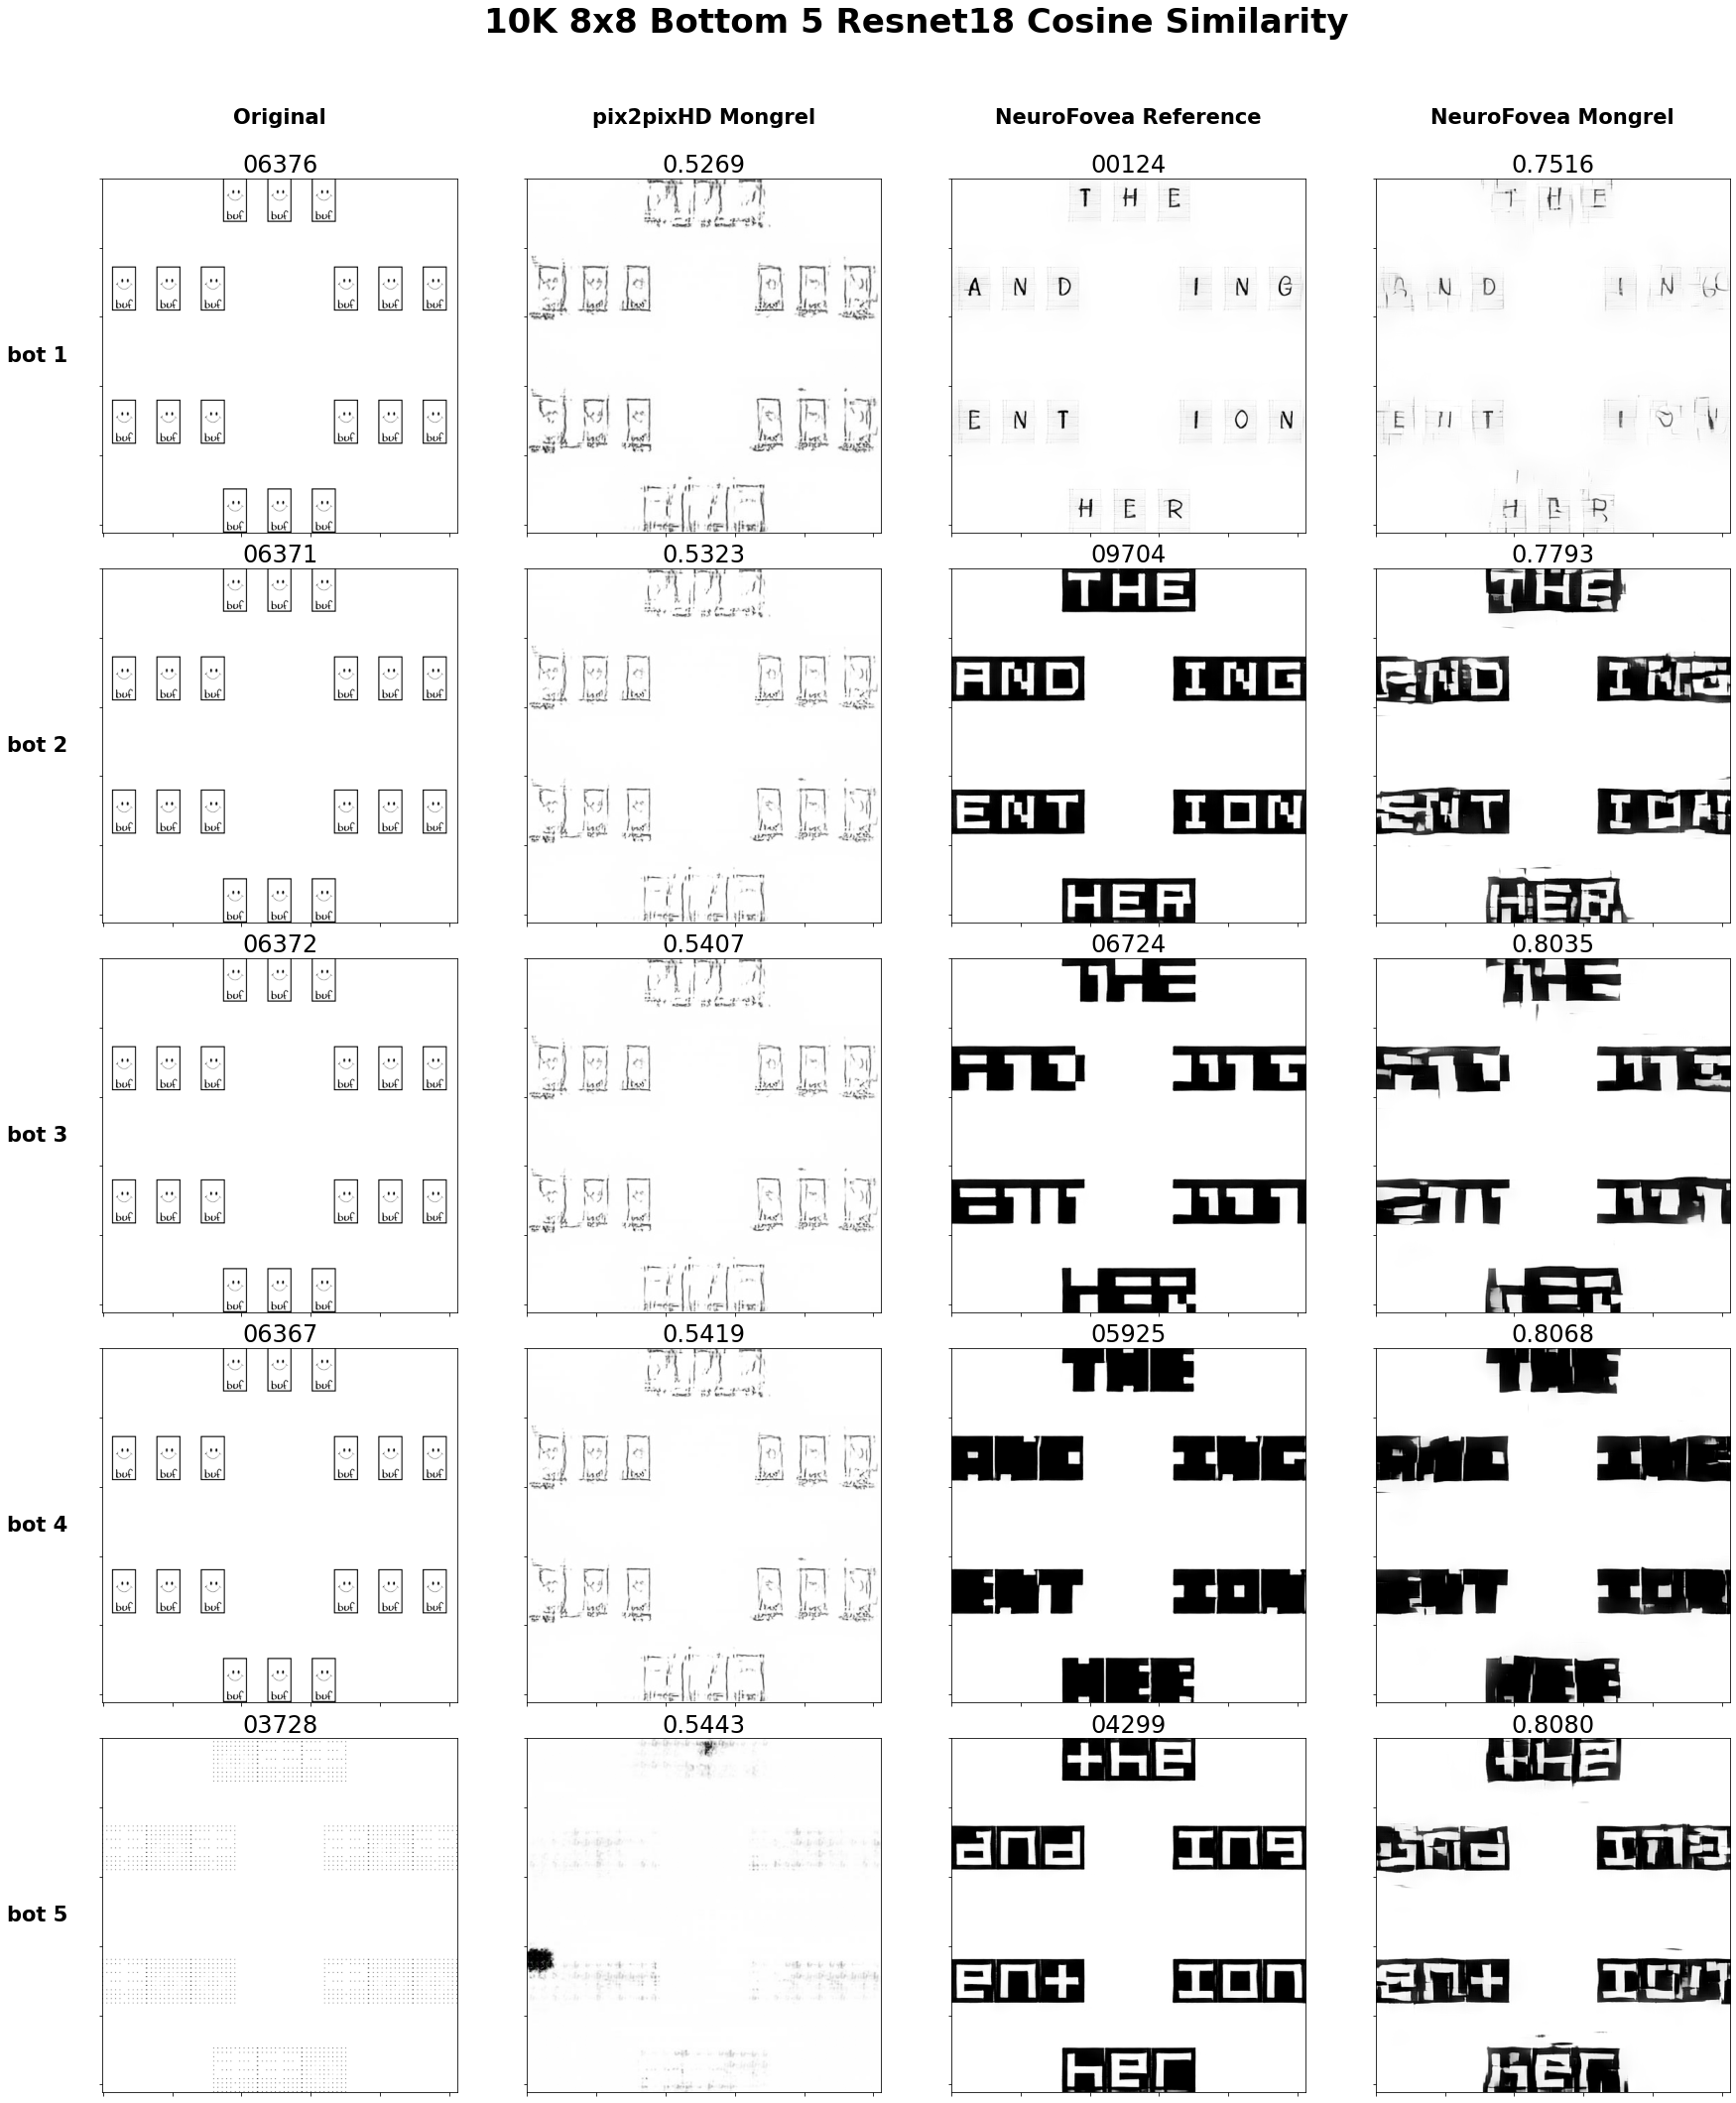

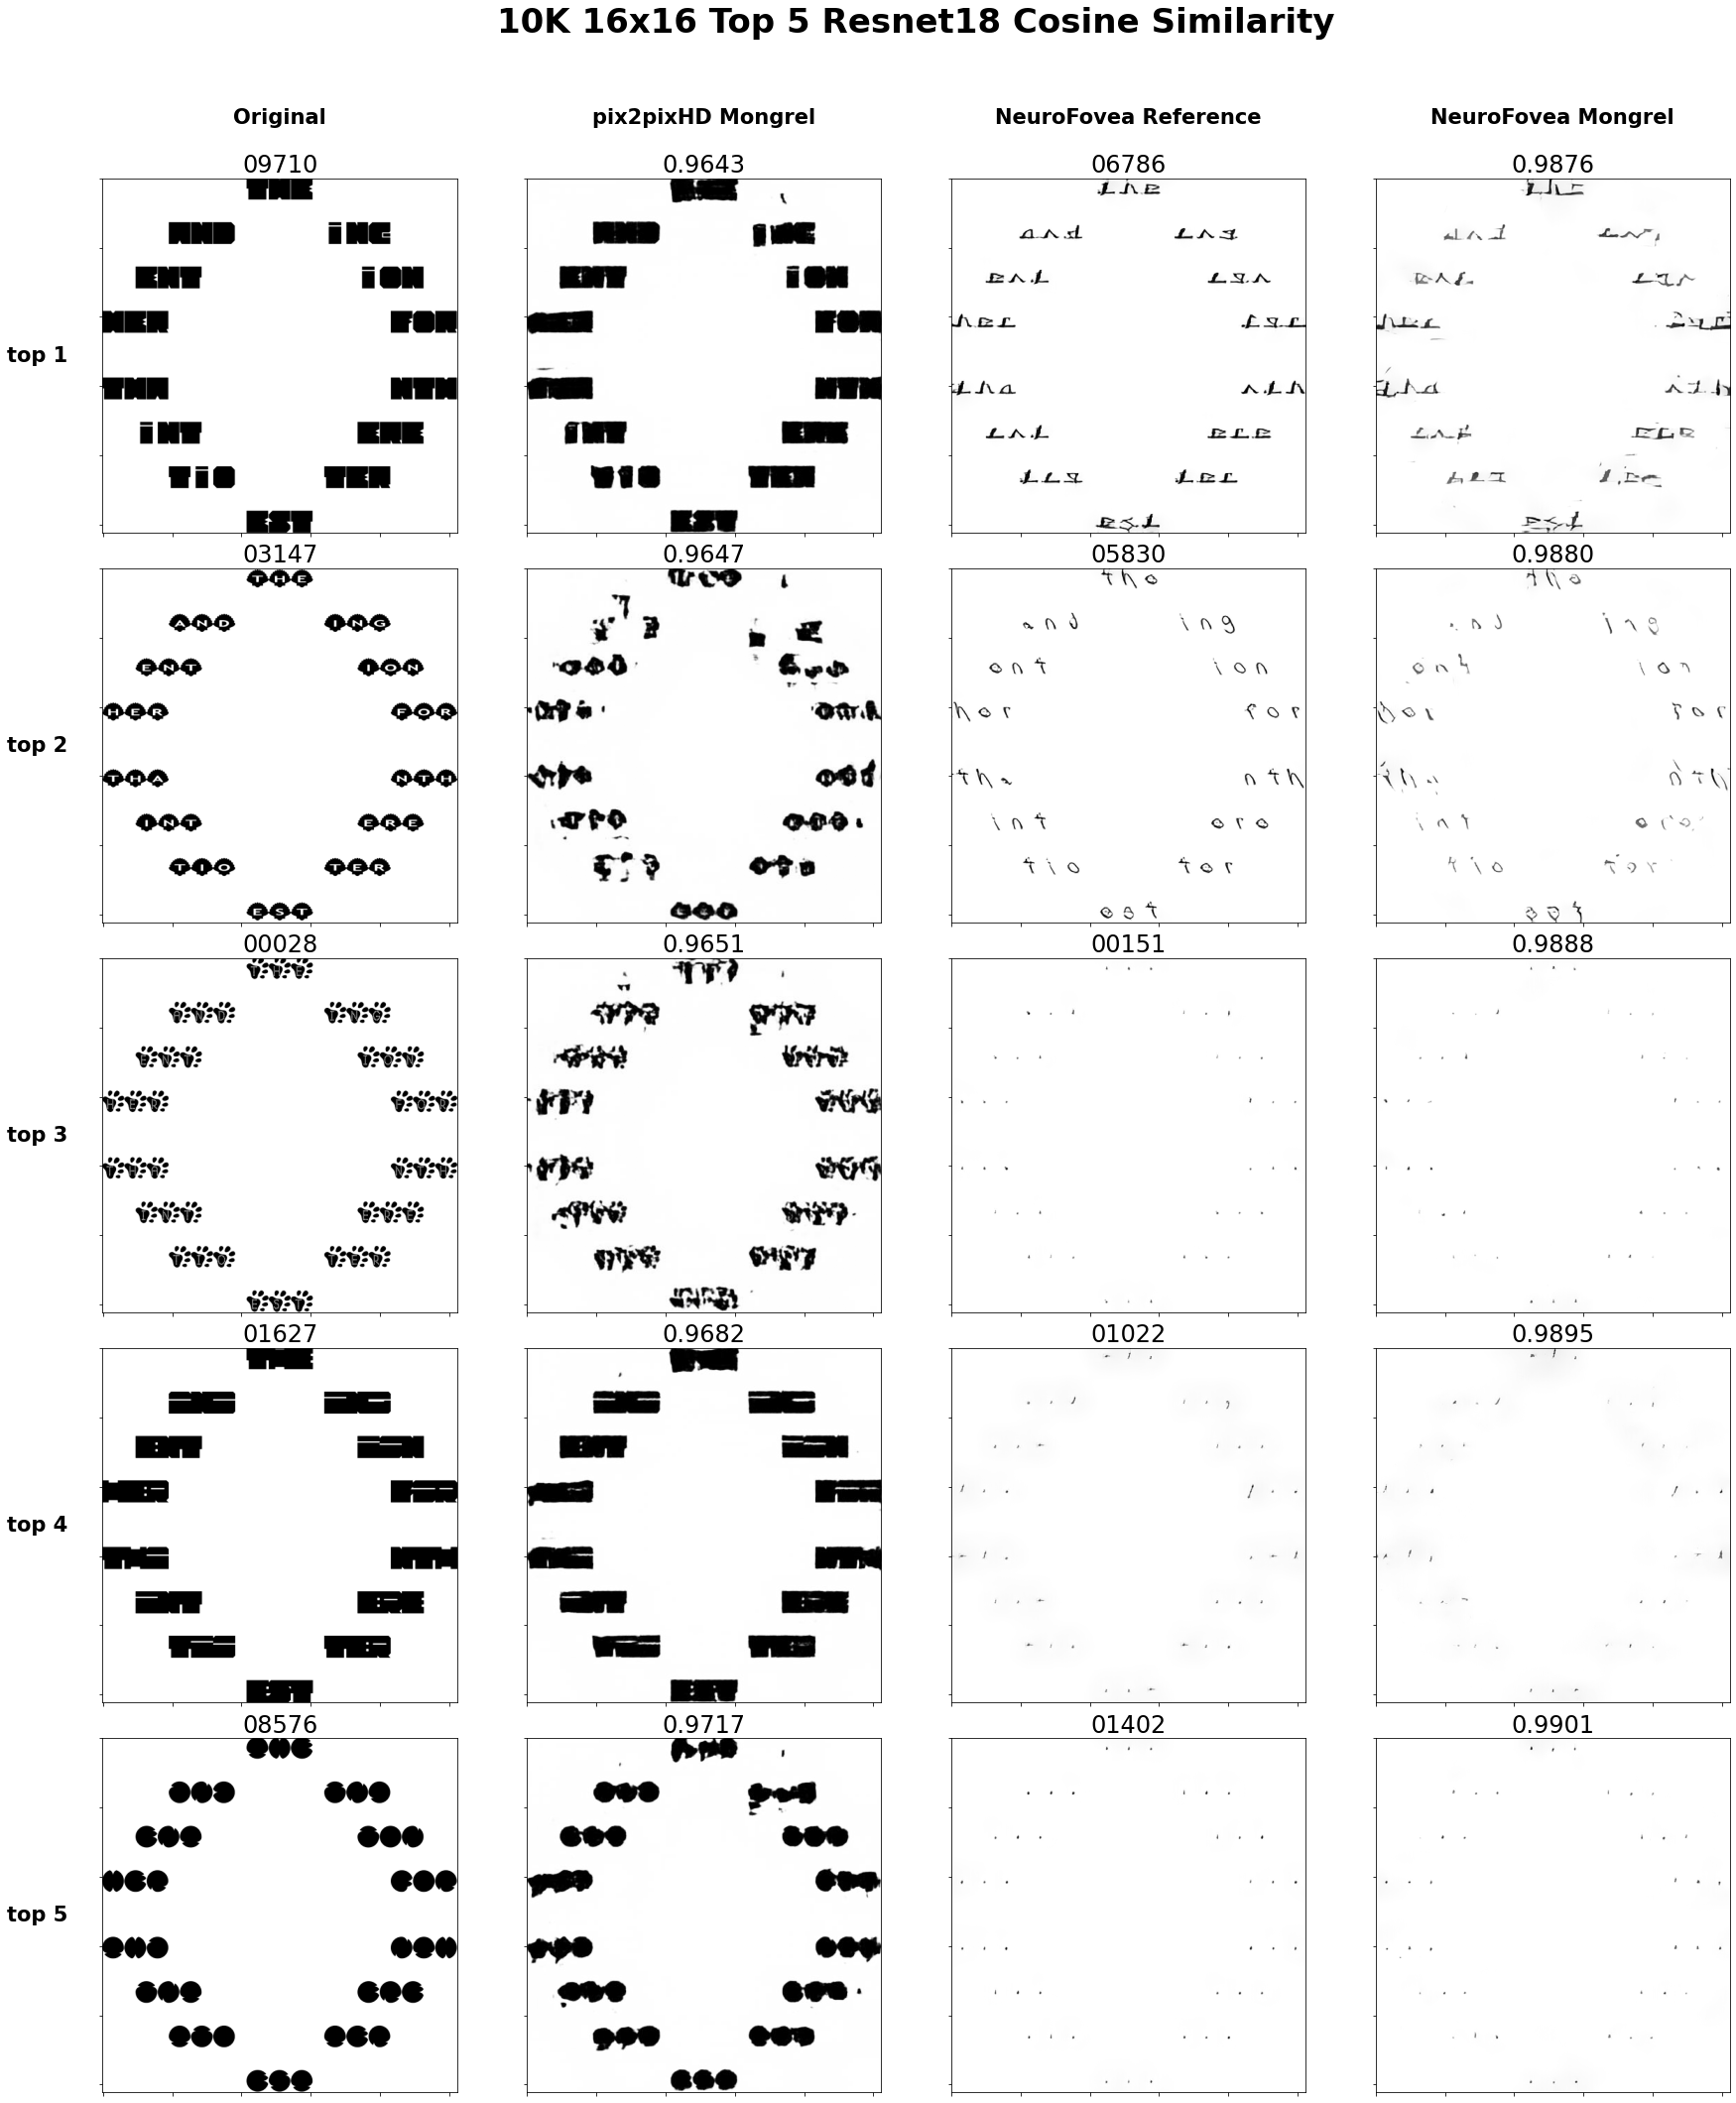

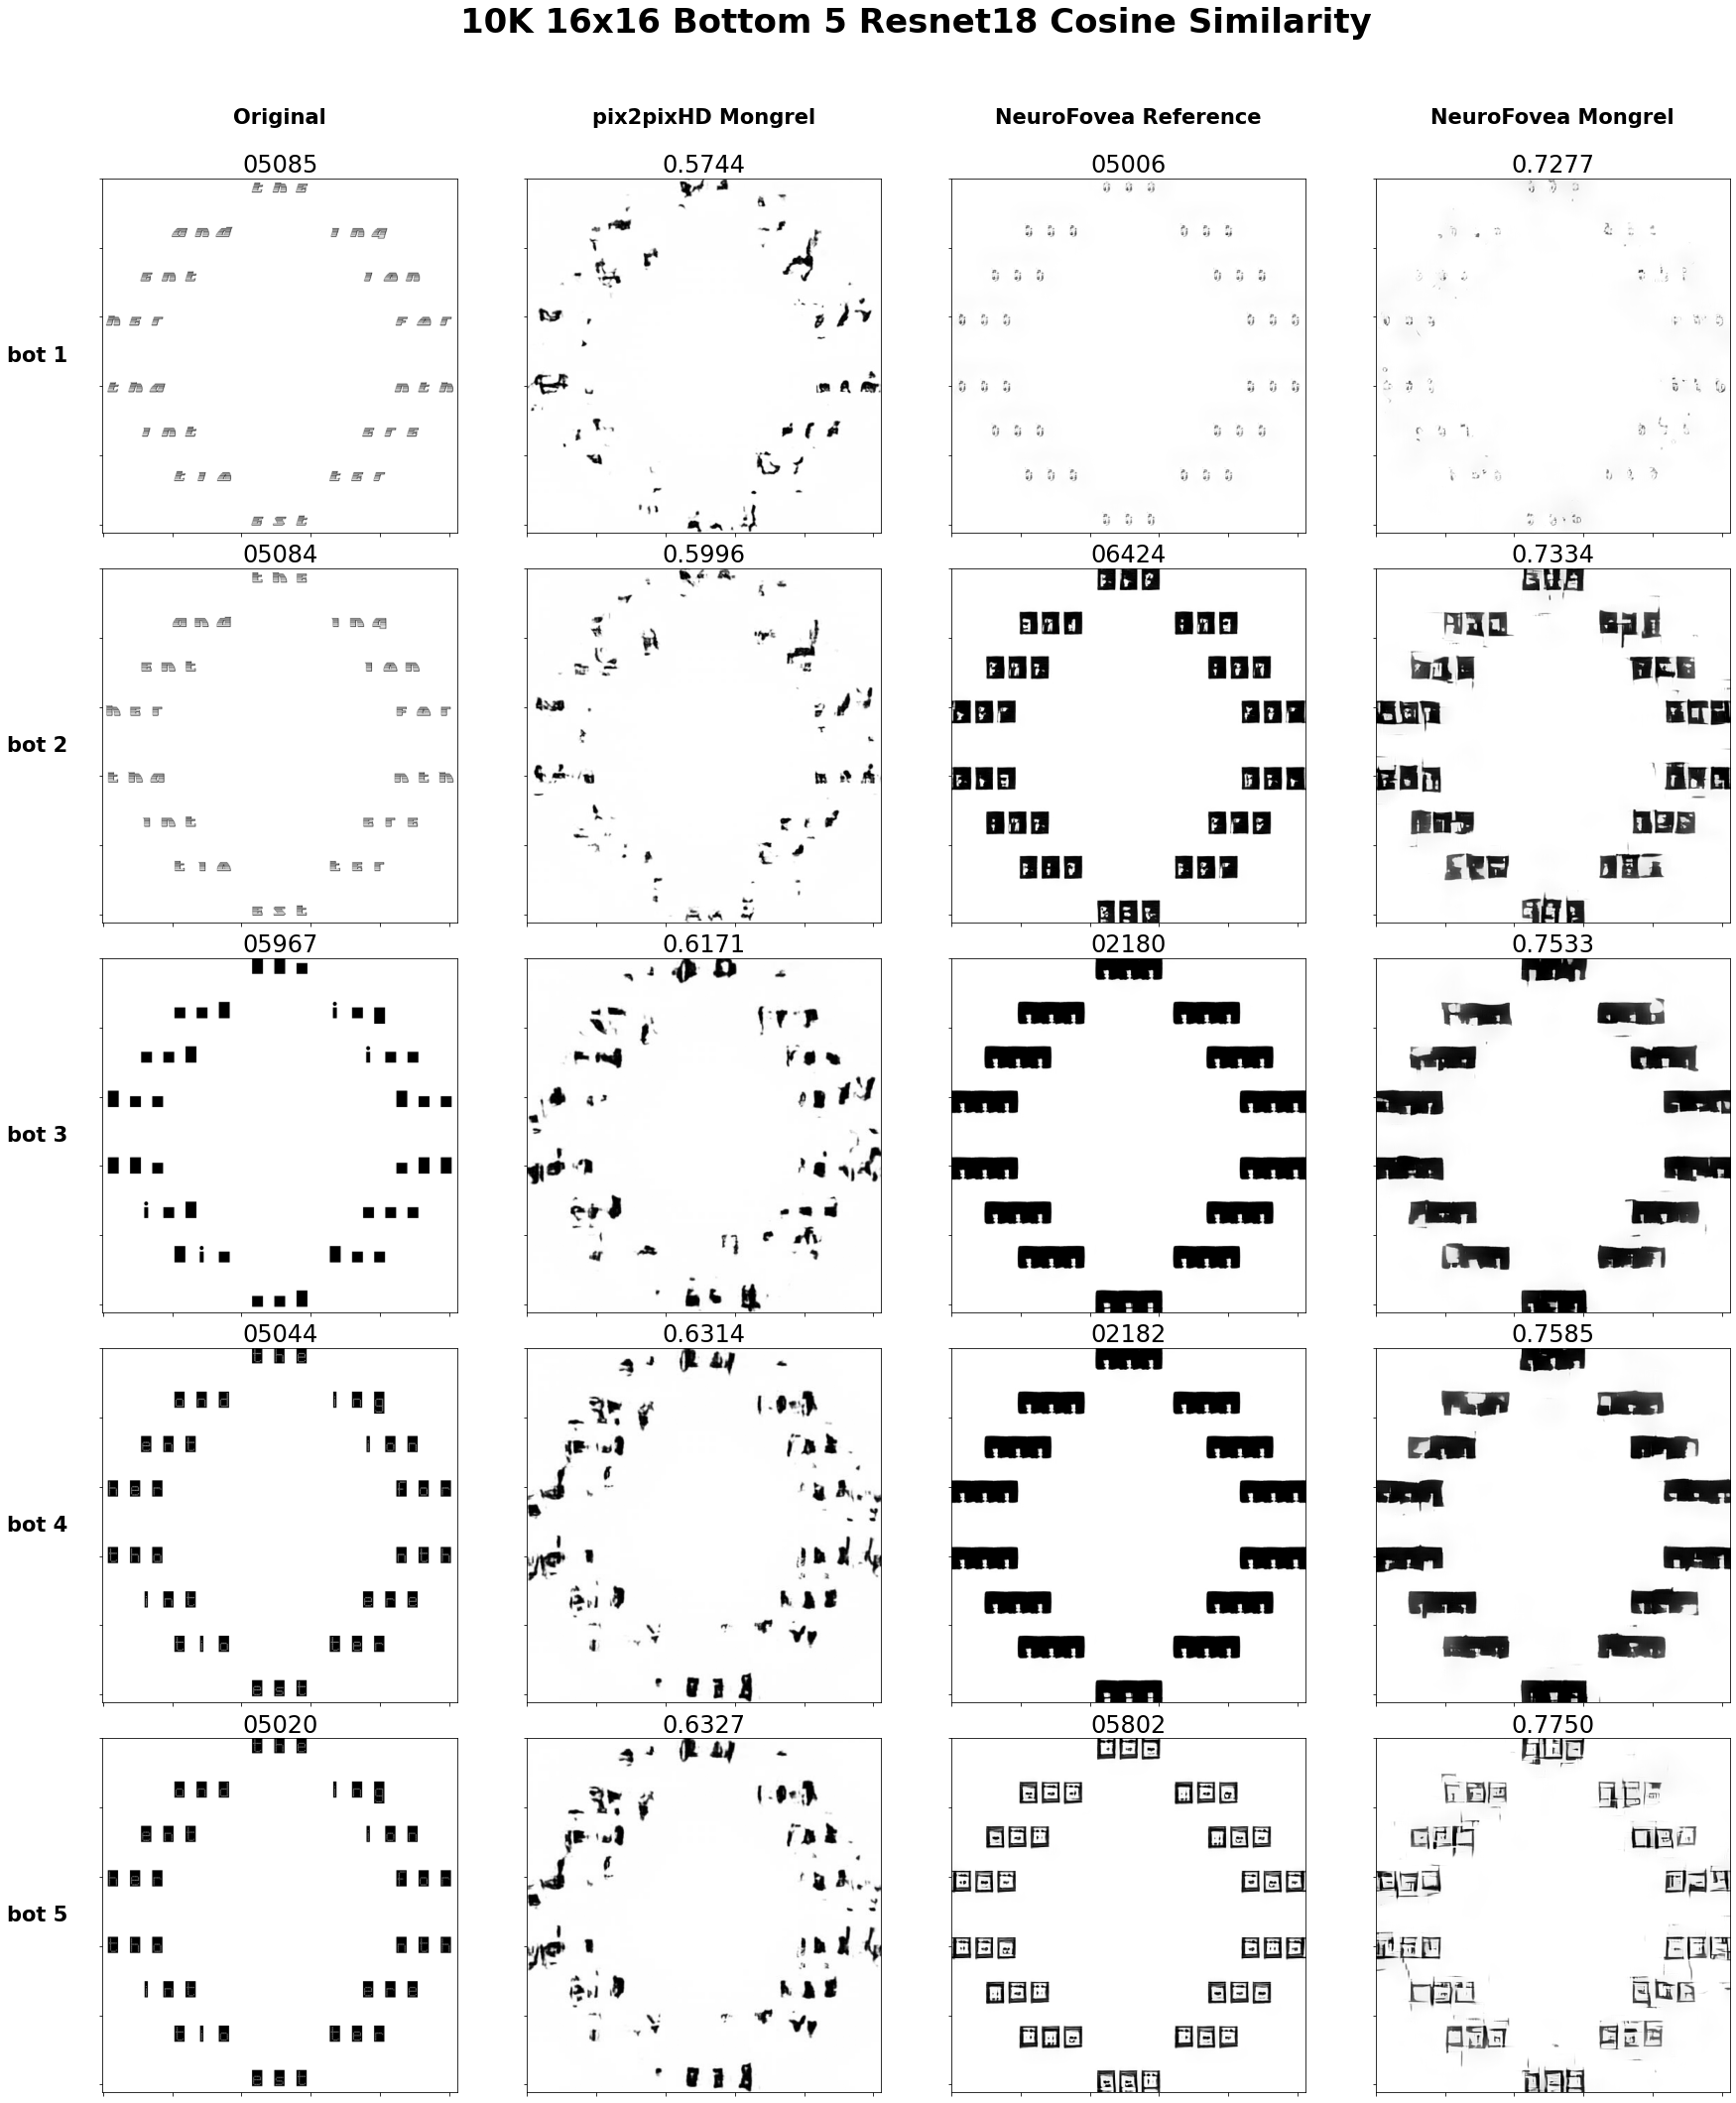

In [17]:
# gen_table_wd_mac("White 8x8", base_path+"white88MY", base_path+"white88NF", 7)
# gen_table_wd_mac("White 16x16", base_path+"white1616MY", base_path+"white1616NF", 3)
# gen_table_cs_mac("White 8x8", base_path+"white88MY", base_path+"white88NF", 7)
# gen_table_cs_mac("White 16x16", base_path+"white1616MY", base_path+"white1616NF", 3)

# gen_table_wd_mac("Grey 8x8", base_path+"grey88MY", base_path+"grey88NF", 7)
# gen_table_wd_mac("Grey 16x16", base_path+"grey1616MY", base_path+"grey1616NF", 3)
# gen_table_cs_mac("Grey 8x8", base_path+"grey88MY", base_path+"grey88NF", 7)
# gen_table_cs_mac("Grey 16x16", base_path+"grey1616MY", base_path+"grey1616NF", 3)

# gen_table_wd_mac("Texture 8x8", base_path+"texture88MY", base_path+"texture88NF", 7)
# gen_table_wd_mac("Texture 16x16", base_path+"texture1616MY", base_path+"texture1616NF", 3)
# gen_table_cs_mac("Texture 8x8", base_path+"grey88MY", base_path+"texture88NF", 7)
# gen_table_cs_mac("Texture 16x16", base_path+"grey1616MY", base_path+"texture1616NF", 3)

# gen_table_wd_mac("Rainbow 8x8", base_path+"rainbow88MY", base_path+"rainbow88NF", 7)
# gen_table_wd_mac("Rainbow 16x16", base_path+"rainbow1616MY", base_path+"rainbow1616NF", 3)
# gen_table_cs_mac("Rainbow 8x8", base_path+"rainbow88MY", base_path+"rainbow88NF", 7)
# gen_table_cs_mac("Rainbow 16x16", base_path+"rainbow1616MY", base_path+"rainbow1616NF", 3)

# gen_table_gt("White 8x8", base_path+"white88GT", 7)
# gen_table_gt("White 16x16", base_path+"white1616GT", 3)

gen_table_wd_mac("10K 8x8", base_path+"100K88MY", base_path+"100K88NF", 7)
gen_table_wd_mac("10K 16x16", base_path+"100K1616MY", base_path+"100K1616NF", 3)
gen_table_cs_mac("10K 8x8", base_path+"100K88MY", base_path+"100K88NF", 7)
gen_table_cs_mac("10K 16x16", base_path+"100K1616MY", base_path+"100K1616NF", 3)


0.5

In [ ]:
def gen_table_with_gt(myListFile, nfListFile, gtListFile, window):
    csListMY = []
    wdListMY = []
    with open(myListFile) as fp:
        ct = 0
        rcs = 0.0
        rwd = 0.0
        for cnt, line in enumerate(fp):
            ct+=1
            ogp, mgp, cs, wd = line.split(",")
            rcs += float(cs)
            rwd += float(wd)
            if ct==window:
                ct = 0
                csListMY.append((ogp, mgp, rcs/window))
                wdListMY.append((ogp, mgp, rwd/window))
    top5MY = sorted(csListMY)
    bot5MY = 
    csListNF = []
    wdListNF = []
